**Actividad 5 para Naples (Extracción de Características)**

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [2]:
#Cargar archivo csv
Naples = pd.read_csv("Datos_limpios_Naples.csv")

In [3]:
# Verificamos información del dataframe
Naples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   11027 non-null  int64  
 1   last_scraped                 11027 non-null  object 
 2   name                         11027 non-null  object 
 3   description                  11027 non-null  object 
 4   neighborhood_overview        11027 non-null  object 
 5   picture_url                  11027 non-null  object 
 6   host_name                    11027 non-null  object 
 7   host_since                   11027 non-null  object 
 8   host_about                   11027 non-null  object 
 9   host_response_time           11027 non-null  object 
 10  host_is_superhost            11027 non-null  object 
 11  host_verifications           11027 non-null  object 
 12  host_has_profile_pic         11027 non-null  object 
 13  host_identity_ve

In [3]:
Naples = Naples.drop(['Unnamed: 0'], axis=1)
Naples

,last_scraped,name,description,neighborhood_overview,picture_url,host_name,host_since,host_about,host_response_time,host_is_superhost,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17/09/2024,Naturists rooms in the heart of city,Right in the heart of Napoli you can walk any...,"close to 2 underground lines, next to bus stop...",https://a0.muscache.com/pictures/miso/Hosting-...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,f,...,0.0,0.0,4.67,4.67,5.00,4.67,5.00,5.00,4.67,0.18
1,17/09/2024,cosy room to let in naples,Oriental decorated apartment with wonderful te...,"Centrally located,close to public transport, i...",https://a0.muscache.com/pictures/171280/92fe69...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,f,...,0.0,0.0,4.74,4.83,4.72,4.83,4.78,4.44,4.56,0.11
2,17/09/2024,Charming Room on Riviera di Chiaia,Centrally located and at walking distance to t...,The house is located in a lively and popular n...,https://a0.muscache.com/pictures/389538/99361e...,Paola,04/12/2010,Le Stanze dei Pollano - this is our website,within a few hours,f,...,21.0,1.0,4.65,4.78,4.50,4.92,4.82,4.73,4.68,0.93
3,17/09/2024,Cozy place in a princely Palace inside Old Town,A really cozy studio (24 square meters) in a p...,The flat is in the OLD TOWN od Napoli with 2 m...,https://a0.muscache.com/pictures/c8a48f3d-1be3...,Davide,17/11/2010,"Architecture, art, archeology, good food.",within an hour,Sin especificar,...,29.0,2.0,4.89,4.88,4.92,4.96,4.97,4.84,4.89,1.68
4,17/09/2024,"Central Cebollitas B&B, spacious private ensuite.","A bright, sunny home in vomero area (on a hill...","La casa di Cebollitas si trova a Napoli, Campa...",https://a0.muscache.com/pictures/miso/Hosting-...,Cebollitas,26/02/2011,Cebollitas is a homely modern b&b situated in...,within an hour,t,...,31.0,0.3,4.97,4.90,4.94,4.90,4.98,4.92,4.94,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11022,17/09/2024,Domus Parthenope Confort,Relax in this peaceful and centrally-located p...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Gianpiero,30/10/2023,Sin especificar,within an hour,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11023,17/09/2024,Casetta lulÃ¹,Your family will be close to everything when y...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Luisa,11/09/2024,Sin especificar,Sin especificar,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11024,17/09/2024,"TATTINELLAâs, hidden gem in the heart of Naples","Located in the beating heart of the city, our ...",Sin especificar,https://a0.muscache.com/pictures/miso/Hosting-...,Simona,28/12/2023,"Ciao, noi siamo Simona&Valentina, sorelle molt...",within an hour,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90
11025,17/09/2024,Irmaâs House casa vacanze,Relax with the whole family at this peaceful a...,Sin especificar,https://a0.muscache.com/pictures/hosting/Hosti...,Jari,09/11/2014,Sin especificar,Sin especificar,f,...,0.0,0.0,4.70,4.90,4.90,4.90,5.00,4.80,4.80,0.90


In [4]:
Naples.head()

,last_scraped,name,description,neighborhood_overview,picture_url,host_name,host_since,host_about,host_response_time,host_is_superhost,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17/09/2024,Naturists rooms in the heart of city,Right in the heart of Napoli you can walk any...,"close to 2 underground lines, next to bus stop...",https://a0.muscache.com/pictures/miso/Hosting-...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,f,...,0.0,0.0,4.67,4.67,5.00,4.67,5.00,5.00,4.67,0.18
1,17/09/2024,cosy room to let in naples,Oriental decorated apartment with wonderful te...,"Centrally located,close to public transport, i...",https://a0.muscache.com/pictures/171280/92fe69...,Gigi,11/04/2014,Innamorato della bellezza quindi la cerco in o...,Sin especificar,f,...,0.0,0.0,4.74,4.83,4.72,4.83,4.78,4.44,4.56,0.11
2,17/09/2024,Charming Room on Riviera di Chiaia,Centrally located and at walking distance to t...,The house is located in a lively and popular n...,https://a0.muscache.com/pictures/389538/99361e...,Paola,04/12/2010,Le Stanze dei Pollano - this is our website,within a few hours,f,...,21.0,1.0,4.65,4.78,4.50,4.92,4.82,4.73,4.68,0.93
3,17/09/2024,Cozy place in a princely Palace inside Old Town,A really cozy studio (24 square meters) in a p...,The flat is in the OLD TOWN od Napoli with 2 m...,https://a0.muscache.com/pictures/c8a48f3d-1be3...,Davide,17/11/2010,"Architecture, art, archeology, good food.",within an hour,Sin especificar,...,29.0,2.0,4.89,4.88,4.92,4.96,4.97,4.84,4.89,1.68
4,17/09/2024,"Central Cebollitas B&B, spacious private ensuite.","A bright, sunny home in vomero area (on a hill...","La casa di Cebollitas si trova a Napoli, Campa...",https://a0.muscache.com/pictures/miso/Hosting-...,Cebollitas,26/02/2011,Cebollitas is a homely modern b&b situated in...,within an hour,t,...,31.0,0.3,4.97,4.90,4.94,4.90,4.98,4.92,4.94,0.52


**Variables categoricas**

In [5]:
# Análisis unitario de las variables categoricas
freq_tbl(Naples)

  last_scraped  frequency  percentage  cumulative_perc
0   17/09/2024      11027         1.0              1.0

----------------------------------------------------------------

                                                    name  frequency  \
0      Suite Superior in Napoli Centro con tutti comf...         10   
1                       Appartamento nel cuore di Napoli          9   
2                                    Camera matrimoniale          7   
3                             Camera matrimoniale deluxe          5   
4                                In Centro Bed&Breakfast          4   
...                                                  ...        ...   
10764  Vesuvio Room -The Volcano from the Central Sta...          1   
10765                      Casa Ruben -  Stanza Nouvelle          1   
10766                         B&B Abbondanza - Reginella          1   
10767                        B&B Abbondanza - Maruzzella          1   
10768                                    L

**1.host_since**

In [6]:
#Obtengo un analisis univariado de una variable categorica en especifico
tabla1=freq_tbl(Naples['host_since'])
tabla1

,host_since,frequency,percentage,cumulative_perc
0,28/06/2019,151,0.013694,0.013694
1,15/11/2022,120,0.010882,0.024576
2,04/05/2017,112,0.010157,0.034733
3,31/10/2014,110,0.009976,0.044708
4,21/09/2016,42,0.003809,0.048517
...,...,...,...,...
2957,25/11/2014,1,0.000091,0.999637
2958,05/01/2013,1,0.000091,0.999728
2959,01/10/2021,1,0.000091,0.999819
2960,29/09/2021,1,0.000091,0.999909


In [7]:
#Elimino las columnas "percentage" y "culu" para trabajar con las frecuencias
tabla2=tabla1.drop(['percentage','cumulative_perc'], axis=1)
tabla2

,host_since,frequency
0,28/06/2019,151
1,15/11/2022,120
2,04/05/2017,112
3,31/10/2014,110
4,21/09/2016,42
...,...,...
2957,25/11/2014,1
2958,05/01/2013,1
2959,01/10/2021,1
2960,29/09/2021,1


In [8]:
#Obtengo un filtro de los valores 
filtro=tabla2[tabla2['frequency']>1]
filtro

filtro_index=filtro.set_index('host_since')
filtro_index

,frequency
host_since,
28/06/2019,151
15/11/2022,120
04/05/2017,112
31/10/2014,110
21/09/2016,42
...,...
26/05/2016,2
22/11/2019,2
03/06/2021,2


<Axes: xlabel='host_since'>

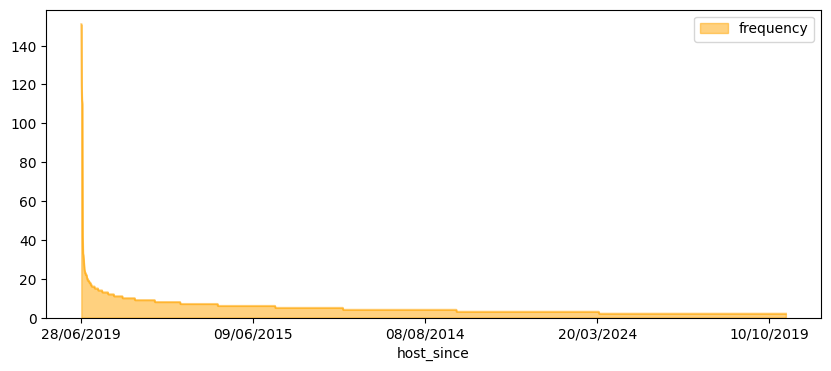

In [10]:
#Realizamos grafico de area del dataframe filtrado 
filtro_index.plot(kind='area', figsize=(10,4), alpha=0.5, color='orange')

**3. host_response_time**

In [9]:
tabla3=freq_tbl(Naples['host_response_time'])
tabla3=tabla3.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla3[tabla3['frequency']>1]
filtro_index=filtro.set_index('host_response_time')
filtro_index

,frequency
host_response_time,
within an hour,7330
Sin especificar,2468
within a few hours,642
within a day,393
a few days or more,194


([0, 1, 2, 3, 4],
 [Text(0, 0, 'within an hour'),
  Text(1, 0, 'Sin especificar'),
  Text(2, 0, 'within a few hours'),
  Text(3, 0, 'within a day'),
  Text(4, 0, 'a few days or more')])

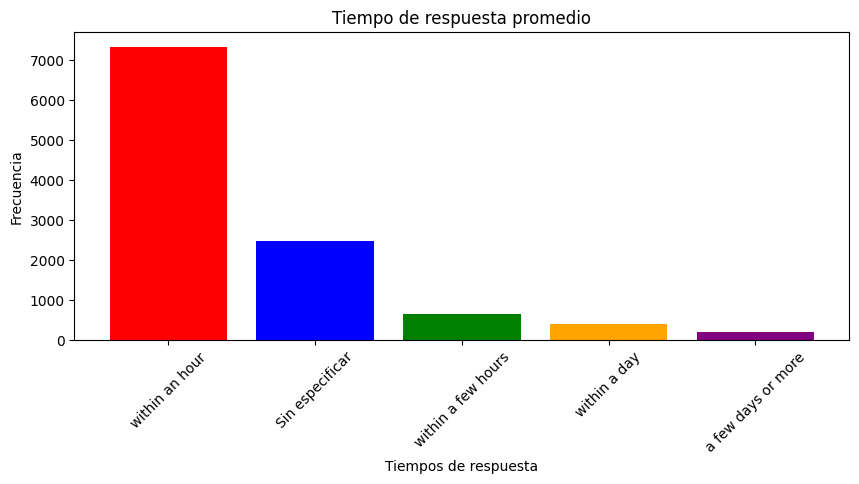

In [10]:
# filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color="orange")
# plt.title('Tiempo de respuesta promedio')
# plt.xlabel('Tiempos de respuesta')
# plt.ylabel('Frecuencia')

colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 4))

# Graficar las barras con distintos colores
ax.bar(filtro_index.index, filtro_index['frequency'], color=colores[:len(filtro_index)])

# Etiquetas
plt.title('Tiempo de respuesta promedio')
plt.xlabel('Tiempos de respuesta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas si son largas

**4.host_is_superhost**

In [13]:
tabla4=freq_tbl(Naples['host_is_superhost'])
tabla4=tabla4.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla4[tabla4['frequency']>1]
filtro_index=filtro.set_index('host_is_superhost')
filtro_index

,frequency
host_is_superhost,
f,7814
t,2825
Sin especificar,388


<Axes: ylabel='frequency'>

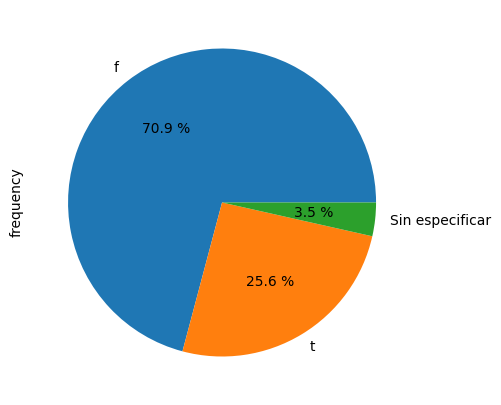

In [14]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**5. host_verifications**

In [15]:
tabla5=freq_tbl(Naples['host_verifications'])
tabla5=tabla5.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla5[tabla5['frequency']>7]
filtro_index=filtro.set_index('host_verifications')
filtro_index

,frequency
host_verifications,
"['email', 'phone']",9342
['phone'],1193
"['email', 'phone', 'work_email']",468
['email'],11


<Axes: xlabel='host_verifications'>

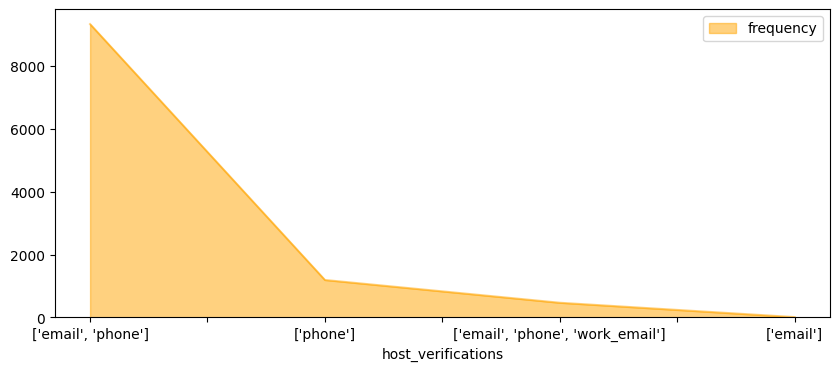

In [16]:
# Realizamos grafico de area del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5, color='orange')

**6. host_has_profile_pic**

In [17]:
tabla6=freq_tbl(Naples['host_has_profile_pic'])
tabla6=tabla6.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla6[tabla6['frequency']>1]
filtro_index=filtro.set_index('host_has_profile_pic')
filtro_index

,frequency
host_has_profile_pic,
t,9997
f,1030


<Axes: ylabel='frequency'>

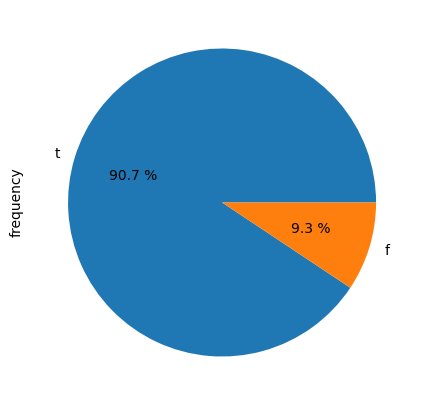

In [18]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**7.host_identity_verified**

In [19]:
tabla7=freq_tbl(Naples['host_identity_verified'])
tabla7=tabla7.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla7[tabla7['frequency']>1]
filtro_index=filtro.set_index('host_identity_verified')
filtro_index

,frequency
host_identity_verified,
t,10218
f,809


<Axes: ylabel='frequency'>

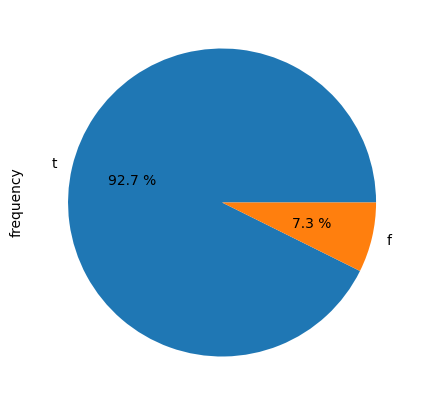

In [20]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**8. property_type**

In [21]:
tabla8=freq_tbl(Naples['property_type'])
tabla8=tabla8.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla8[tabla8['frequency']>10]
filtro_index=filtro.set_index('property_type')
filtro_index

,frequency
property_type,
Entire rental unit,4095
Private room in bed and breakfast,1690
Entire condo,1366
Private room in rental unit,1093
Entire home,921
Entire vacation home,451
Private room in condo,311
Private room in home,142
Entire loft,110


Text(0, 0.5, 'Frecuencia')

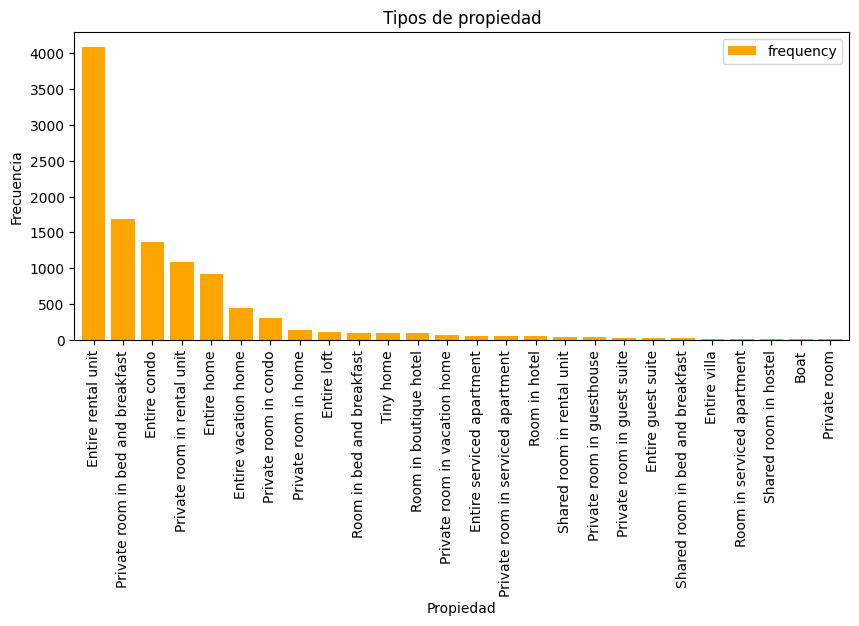

In [22]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Tipos de propiedad')
plt.xlabel('Propiedad')
plt.ylabel('Frecuencia')

**9.room_type**

In [23]:
tabla9=freq_tbl(Naples['room_type'])
tabla9=tabla9.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla9[tabla9['frequency']>1]
filtro_index=filtro.set_index('room_type')
filtro_index

,frequency
room_type,
Entire home/apt,7195
Private room,3621
Hotel room,128
Shared room,83


Text(0, 0.5, 'Frecuencia')

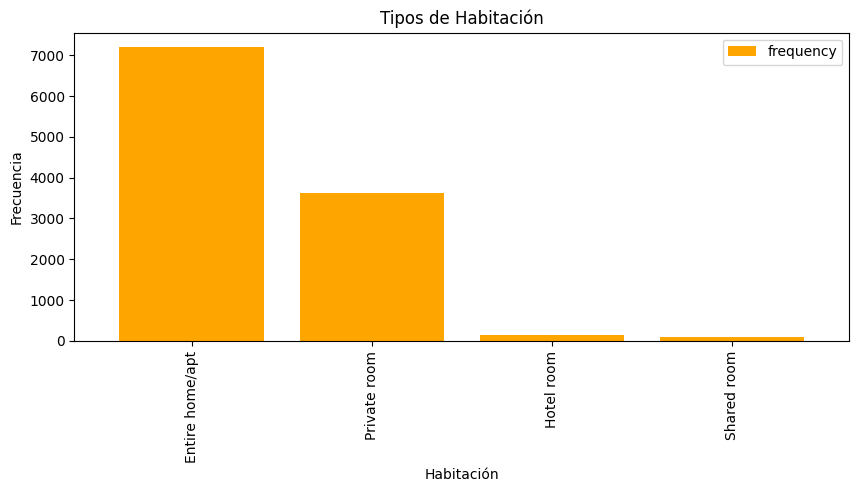

In [24]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Tipos de Habitación')
plt.xlabel('Habitación')
plt.ylabel('Frecuencia')

**10. amenities**

In [25]:
tabla10=freq_tbl(Naples['amenities'])
# tabla10=tabla10.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla10[tabla10['frequency']>1]
filtro_index=filtro.set_index('amenities')
filtro_index

,frequency,percentage,cumulative_perc
amenities,,,
"[""Air conditioning"", ""TV"", ""Kitchen"", ""Wifi""]",45,0.004081,0.004081
"[""TV"", ""Kitchen"", ""Wifi"", ""Air conditioning"", ""Washer""]",31,0.002811,0.006892
"[""Air conditioning"", ""TV"", ""Wifi"", ""Lock on bedroom door""]",15,0.001360,0.008252
"[""Air conditioning"", ""TV"", ""Wifi""]",13,0.001179,0.009431
"[""TV"", ""Exterior security cameras on property"", ""Kitchen"", ""Wifi"", ""Air conditioning""]",12,0.001088,0.010520
...,...,...,...
"[""TV"", ""Exterior security cameras on property"", ""Kitchen"", ""Wifi"", ""Air conditioning"", ""Washer"", ""Pets allowed""]",2,0.000181,0.100209
"[""TV"", ""Exterior security cameras on property"", ""Kitchen"", ""Wifi"", ""Dedicated workspace"", ""Air conditioning"", ""Washer""]",2,0.000181,0.100390
"[""Hot water"", ""Kitchen"", ""Essentials"", ""Coffee maker"", ""Cooking basics"", ""Iron"", ""Extra pillows and blankets"", ""Lock on bedroom door"", ""Breakfast"", ""Heating"", ""Dishes and silverware"", ""Private entrance"", ""Hair dryer"", ""Host greets you"", ""Shampoo"", ""Hangers"", ""Wifi"", ""Refrigerator"", ""Air conditioning"", ""Bed linens"", ""Stove"", ""Pets allowed"", ""TV"", ""First aid kit"", ""Oven""]",2,0.000181,0.100571


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

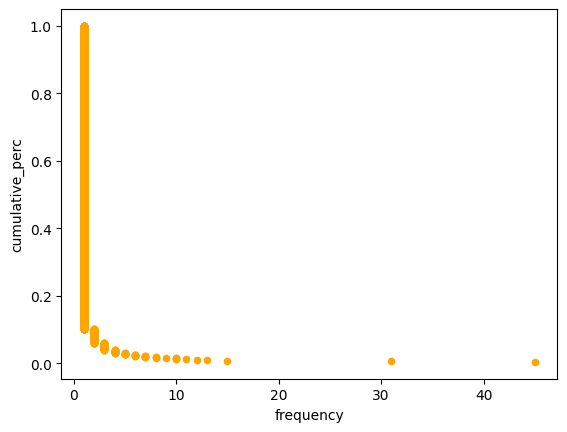

In [26]:
tabla10.plot("frequency", "cumulative_perc", kind="scatter", color="orange")

**11. calendar_updated**

In [27]:
tabla11=freq_tbl(Naples['calendar_updated'])
#tabla8=tabla8.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla11[tabla11['frequency']>1]
filtro_index=filtro.set_index('calendar_updated')
filtro_index

,frequency,percentage,cumulative_perc
calendar_updated,,,
Sin especificar,11027,1.0,1.0


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

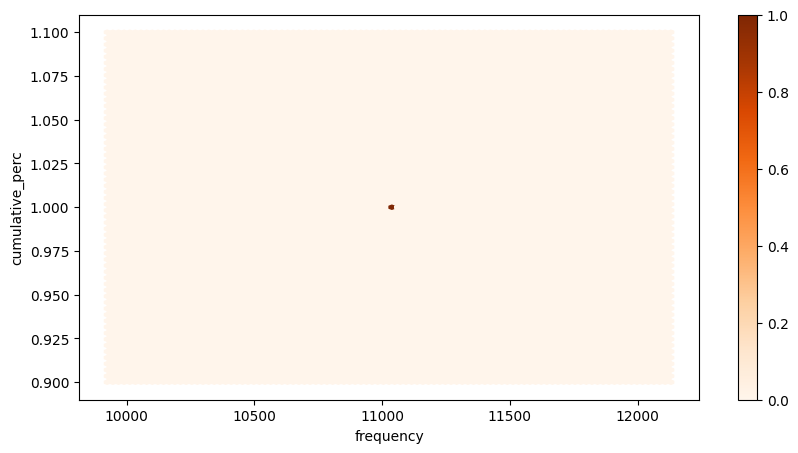

In [28]:
tabla11.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5), cmap="Oranges")

**12. has_availability**

In [29]:
tabla12=freq_tbl(Naples['has_availability'])
tabla12=tabla12.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla12[tabla12['frequency']>1]
filtro_index=filtro.set_index('has_availability')
filtro_index

,frequency
has_availability,
t,10994
Sin especificar,32


<Axes: ylabel='frequency'>

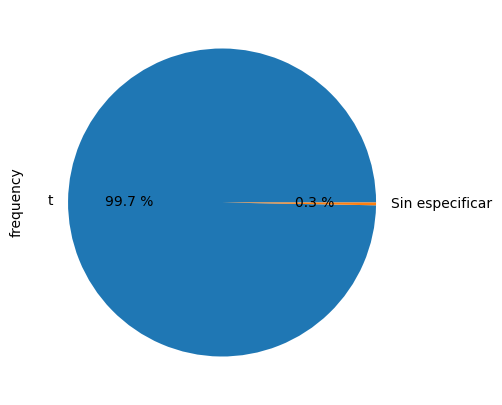

In [30]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**13. instant_bookable**

In [31]:
tabla13=freq_tbl(Naples['instant_bookable'])
tabla13=tabla13.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla13[tabla13['frequency']>1]
filtro_index=filtro.set_index('instant_bookable')
filtro_index

,frequency
instant_bookable,
t,6295
f,4732


<Axes: ylabel='frequency'>

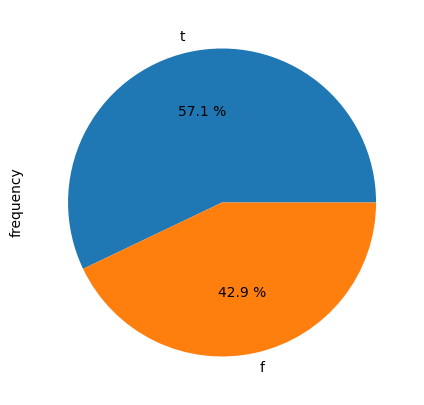

In [32]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**14. Name**

In [33]:
tabla14=freq_tbl(Naples['name'])
tabla14=tabla14.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla14[tabla14['frequency']>3]
filtro_index=filtro.set_index('name')
filtro_index

,frequency
name,
Suite Superior in Napoli Centro con tutti comfort!,10
Appartamento nel cuore di Napoli,9
Camera matrimoniale,7
Camera matrimoniale deluxe,5
In Centro Bed&Breakfast,4
Lovely apartment in the center of Naples,4
[Garibaldi Train Station] Convitalia Napoli Rooms,4
B&B SAN FERDINANDO VACANZA A NAPOLI,4
One room apartment complete - Acquaviva Apartments,4


<Axes: ylabel='frequency'>

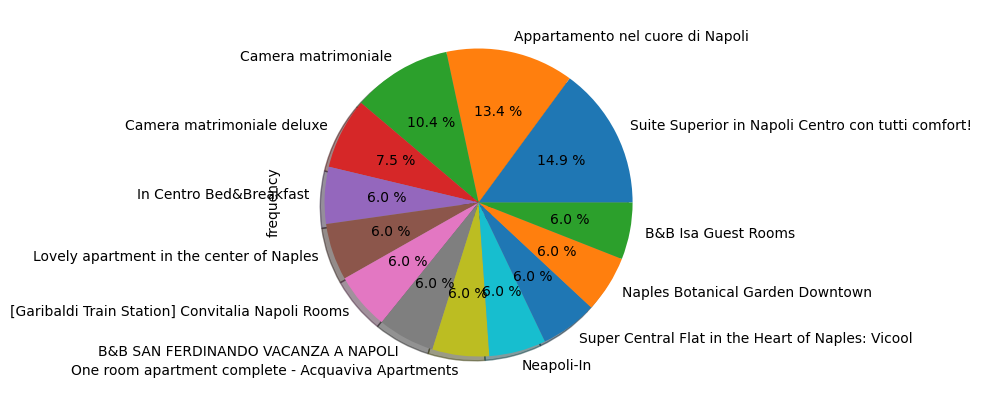

In [34]:
# Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**15. license**

In [35]:
tabla15=freq_tbl(Naples['license'])
#tabla8=tabla8.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla15[tabla15['frequency']>1]
filtro_index=filtro.set_index('license')
filtro_index

,frequency,percentage,cumulative_perc
license,,,
Sin especificar,9489,0.860524,0.860524
Exempt,18,0.001632,0.862157
2486,13,0.001179,0.863335
15063049EXT1042,9,0.000816,0.864152
IT063049B4UBBVR68J,7,0.000635,0.864786
...,...,...,...
IT063049C2NMKITXV3,2,0.000181,0.917838
IT063049C2BA88NAOQ,2,0.000181,0.918019
IT063049C13QAKZB84,2,0.000181,0.918201


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

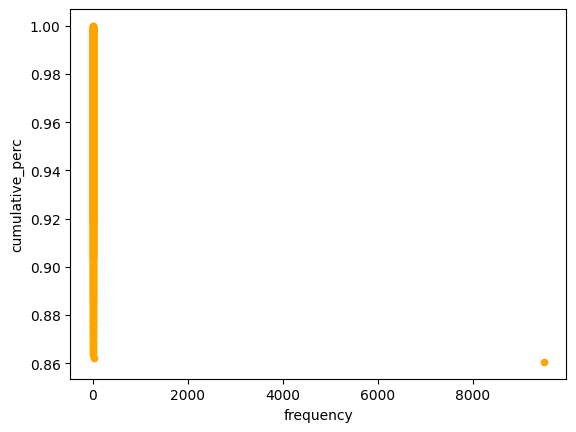

In [36]:
tabla15.plot("frequency","cumulative_perc", kind="scatter", color='orange')

**16. last_scraped**

In [37]:
tabla16=freq_tbl(Naples['last_scraped'])
#tabla16=tabla16.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla16[tabla16['frequency']>1]
filtro_index=filtro.set_index('last_scraped')
filtro_index

,frequency,percentage,cumulative_perc
last_scraped,,,
17/09/2024,11027,1.0,1.0


<Axes: ylabel='frequency'>

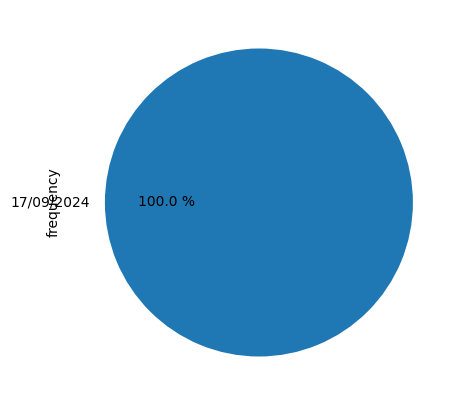

In [38]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**17 host_name**

In [39]:
tabla17=freq_tbl(Naples['host_name'])
tabla17=tabla17.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla17[tabla17['frequency']>150]
filtro_index=filtro.set_index('host_name')
filtro_index

,frequency
host_name,
Antonio,284
Francesco,275
Salvatore,220
Giuseppe,215
Vincenzo,186
Luigi,170
Marco,165
Maria,163
Anna,156


Text(0, 0.5, 'Frecuencia')

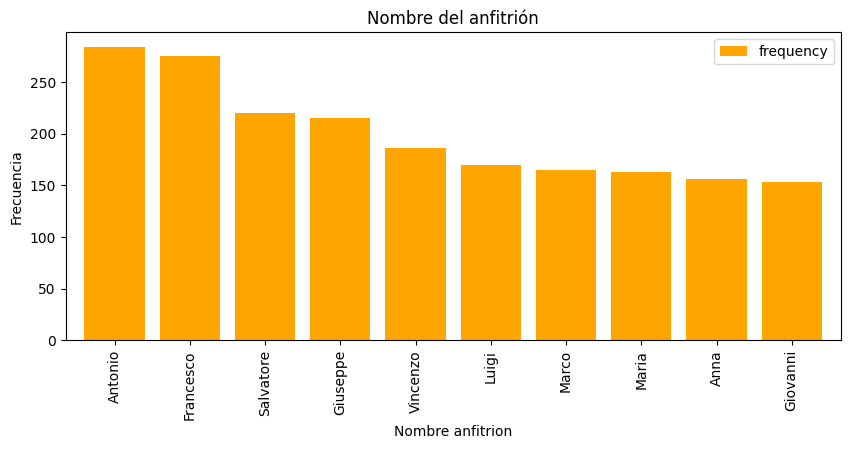

In [40]:
# Realizamos grafico pde barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Nombre del anfitrión')
plt.xlabel('Nombre anfitrion')
plt.ylabel('Frecuencia')

**18. last_review**

In [41]:
tabla18=freq_tbl(Naples['last_review'])
tabla18=tabla18.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla18[tabla18['frequency']>50]
filtro_index=filtro.set_index('last_review')
filtro_index

,frequency
last_review,
Sin especificar,2449
15/09/2024,302
14/09/2024,239
13/09/2024,203
12/09/2024,200
09/09/2024,187
08/09/2024,184
11/09/2024,168
16/09/2024,166


Text(0, 0.5, 'Frecuencia')

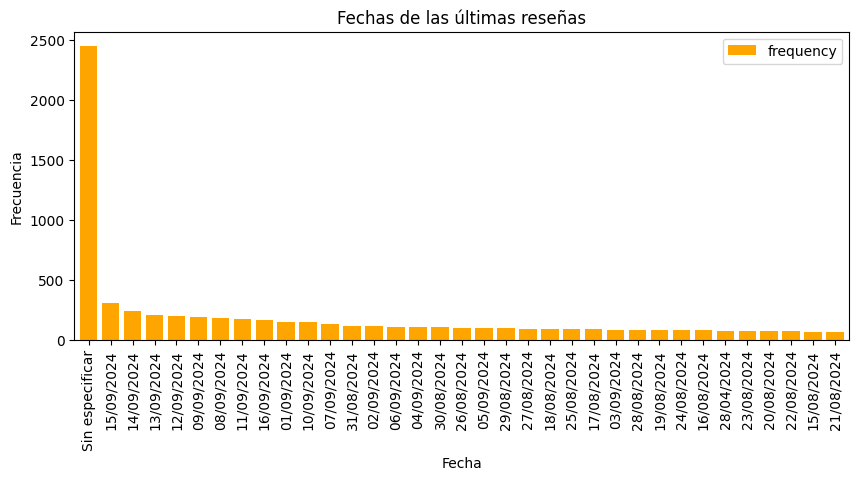

In [42]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Fechas de las últimas reseñas')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')

**19. neighbourhood**

In [43]:
tabla19=freq_tbl(Naples['neighbourhood'])
# tabla19=tabla19.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla19[tabla19['frequency']>4]
filtro_index=filtro.set_index('neighbourhood')
filtro_index

,frequency,percentage,cumulative_perc
neighbourhood,,,
Sin especificar,5523,0.500862,0.500862
"Napoli, Campania, Italy",5237,0.474925,0.975787
"Naples, Campania, Italy",209,0.018953,0.994740
"Napoli, Italy",10,0.000907,0.995647
"Napoli, Italia, Italy",5,0.000453,0.996100


Text(0, 0.5, 'Frecuencia')

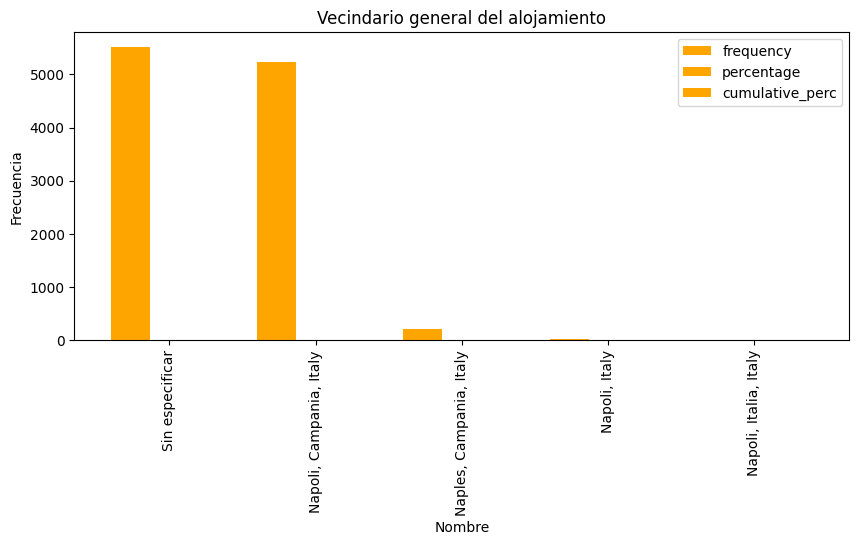

In [44]:
# Realizamos grafico pde barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Vecindario general del alojamiento')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

**20. calendar_last_scraped**

In [45]:
tabla20=freq_tbl(Naples['calendar_last_scraped'])
tabla20=tabla20.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla20[tabla20['frequency']>1]
filtro_index=filtro.set_index('calendar_last_scraped')
filtro_index

,frequency
calendar_last_scraped,
17/09/2024,11027


<Axes: ylabel='frequency'>

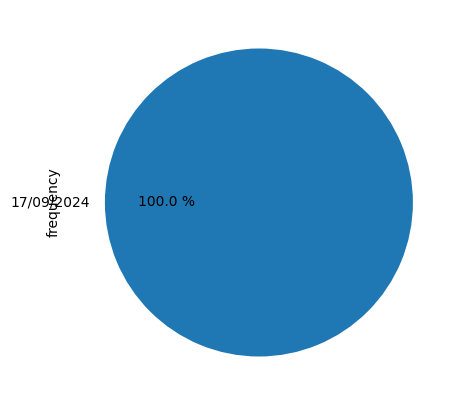

In [46]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**21. description**

In [47]:
tabla21=freq_tbl(Naples['description'])
# tabla10=tabla10.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla21[tabla21['frequency']>1]
filtro_index=filtro.set_index('description')
filtro_index

,frequency,percentage,cumulative_perc
description,,,
Sin especificar,273,0.024757,0.024757
Relax in this quiet space in a central location.,72,0.006529,0.031287
Enjoy a stylish vacation in this downtown space.,51,0.004625,0.035912
Relax in this peaceful and centrally-located place.,45,0.004081,0.039993
"With this downtown home, your family will be close to everything.",41,0.003718,0.043711
...,...,...,...
"The apartment is spacious and very central (in front of the Dante metro station), a few steps from every site of interest and convenient to reach from the station, port and airport. Located in a period building with a doorman, it is equipped with three bedrooms, two bathrooms, two terraces with a view, equipped kitchen and living room.",2,0.000181,0.209939
"Thanks to its strategic location, this space offers easy access to all local attractions.",2,0.000181,0.210121
"Megaris is a property with 5 suites in the heart of Naples.<br />A few steps from the famous San Gregorio Armeno, the decumani, the Duomo and the most famous monuments in the historic center of Naples.<br />5 luxury suites, equipped with all the comforts, enriched by many exclusive services: from guided tours to the rental of electric vehicles, from the helicopter flight to the dinner in one of the most evocative restaurants of the city.<br />In short, Megaris is a luxury experience to experience!",2,0.000181,0.210302


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

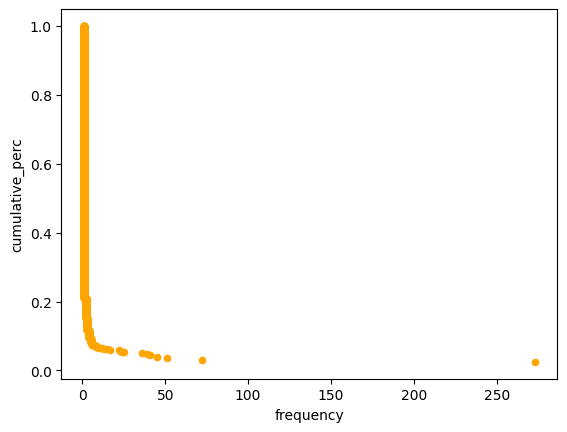

In [48]:
tabla21.plot("frequency", "cumulative_perc", kind="scatter",  color='orange')

**VARIABLES NO CATEGORICAS**

Determinación de clases para datos agrupados

In [49]:
# Corroborar valores nulos
valores_nulos = Naples.isnull().sum()
valores_nulos

last_scraped                   0
name                           0
description                    0
neighborhood_overview          0
picture_url                    0
host_name                      0
host_since                     0
host_about                     0
host_response_time             0
host_is_superhost              0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
calendar_updated               0
has_availability               0
calendar_last_scraped          0
last_review                    0
license                        0
instant_bookable               0
id                             0
host_response_rate             0
host_acceptance_rate           0
host_listings_count            0
host_total_listings_count      0
accommodates                   0
bathrooms 

**1. host_acceptance_rate**

In [50]:
# Calculamos el numero total de la poblacion "n"
Naples['host_acceptance_rate'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [51]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['host_acceptance_rate'].max()
Min = Naples['host_acceptance_rate'].min()
Limites = [Min, Max]
Limites

[0.75, 1.0]

In [52]:
# Calculamos el rango R
R = Max - Min
R

0.25

In [53]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [54]:
# Caluclamos el ancho del intervalo "i"
i = R/12
i

0.020833333333333332

In [55]:
intervalos = np.linspace(0.75, 1.0, 12)
intervalos

array([0.75      , 0.77272727, 0.79545455, 0.81818182, 0.84090909,
       0.86363636, 0.88636364, 0.90909091, 0.93181818, 0.95454545,
       0.97727273, 1.        ])

In [56]:
categorias = ["Prácticamente no acepta reservas","Raramente disponible", "Difícil de reservar", "Pocas reservas aceptadas", "Disponibilidad limitada", "Acepta algunas reservas", "Buena disponibilidad","La mayoría de reservas aceptadas","Alta disponibilidad","Disponibilidad casi total","Siempre disponible para reservas"]

In [57]:
# Finalmente creamos las categorias en la columna númerica
Naples['host_acceptance_rate'] = pd.cut(x = Naples['host_acceptance_rate'], bins=intervalos, labels = categorias)
Naples['host_acceptance_rate']

0        Siempre disponible para reservas
1        Siempre disponible para reservas
2        Siempre disponible para reservas
3        Siempre disponible para reservas
4        Siempre disponible para reservas
                       ...               
11022    Siempre disponible para reservas
11023                Buena disponibilidad
11024                Buena disponibilidad
11025                Buena disponibilidad
11026    Siempre disponible para reservas
Name: host_acceptance_rate, Length: 11027, dtype: category
Categories (11, object): ['Prácticamente no acepta reservas' < 'Raramente disponible' < 'Difícil de reservar' < 'Pocas reservas aceptadas' ... 'La mayoría de reservas aceptadas' < 'Alta disponibilidad' < 'Disponibilidad casi total' < 'Siempre disponible para reservas']

In [58]:
tabla1=freq_tbl(Naples['host_acceptance_rate'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('host_acceptance_rate')
filtro_index

,frequency
host_acceptance_rate,
Siempre disponible para reservas,7833
Buena disponibilidad,1843
Disponibilidad casi total,337
La mayoría de reservas aceptadas,289
Alta disponibilidad,227
Difícil de reservar,102
Pocas reservas aceptadas,93
Disponibilidad limitada,87
Acepta algunas reservas,68


Text(0, 0.5, 'Frecuencia')

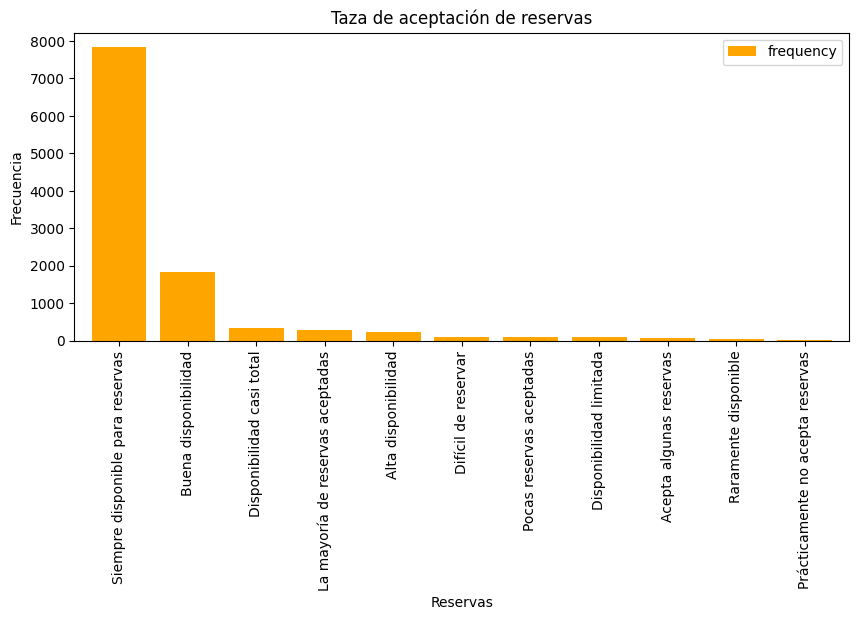

In [59]:
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Taza de aceptación de reservas')
plt.xlabel('Reservas')
plt.ylabel('Frecuencia')

**2. host_listings_count**

In [60]:
Naples['host_listings_count'].info()
n = 11027
Max = Naples['host_listings_count'].max()
Min = Naples['host_listings_count'].min()
Limites = [Min, Max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: host_listings_count
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


[1.0, 11.0]

In [61]:
R = Max - Min
R

10.0

In [62]:
i = R/12
i

0.8333333333333334

In [63]:
intervalos = np.linspace(0.99, 11.0, 12)
intervalos

array([ 0.99,  1.9 ,  2.81,  3.72,  4.63,  5.54,  6.45,  7.36,  8.27,
        9.18, 10.09, 11.  ])

In [64]:
categorias=["Dueño de una sola propiedad","Manejo de pocas propiedades","Pequeña cartera de alojamientos","Inicio de un negocio de hospedaje","Expansión moderada","Gestión de múltiples propiedades","Negocio en crecimiento","Administración a gran escala","Estructura empresarial fuerte","Alcance significativo en varias zonas","Nivel de hotelería profesional"]

In [65]:
Naples['host_listings_count'] = pd.cut(x = Naples['host_listings_count'], bins=intervalos, labels = categorias)
Naples['host_listings_count']

0             Administración a gran escala
1             Administración a gran escala
2              Dueño de una sola propiedad
3          Pequeña cartera de alojamientos
4        Inicio de un negocio de hospedaje
                       ...                
11022          Manejo de pocas propiedades
11023          Dueño de una sola propiedad
11024          Dueño de una sola propiedad
11025          Dueño de una sola propiedad
11026          Dueño de una sola propiedad
Name: host_listings_count, Length: 11027, dtype: category
Categories (11, object): ['Dueño de una sola propiedad' < 'Manejo de pocas propiedades' < 'Pequeña cartera de alojamientos' < 'Inicio de un negocio de hospedaje' ... 'Administración a gran escala' < 'Estructura empresarial fuerte' < 'Alcance significativo en varias zonas' < 'Nivel de hotelería profesional']

In [66]:
tabla1=freq_tbl(Naples['host_listings_count'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('host_listings_count')
filtro_index

,frequency
host_listings_count,
Dueño de una sola propiedad,3538
Pequeña cartera de alojamientos,2719
Manejo de pocas propiedades,1690
Inicio de un negocio de hospedaje,1068
Expansión moderada,670
Gestión de múltiples propiedades,464
Negocio en crecimiento,289
Administración a gran escala,245
Alcance significativo en varias zonas,139


Text(0, 0.5, 'Frecuencia')

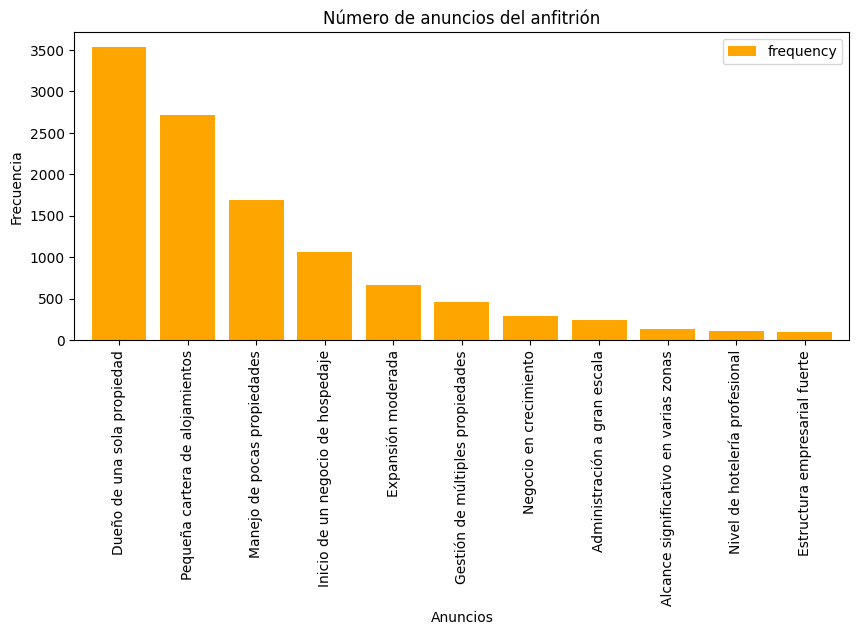

In [67]:
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Número de anuncios del anfitrión')
plt.xlabel('Anuncios')
plt.ylabel('Frecuencia')

**3. accommodates**

In [68]:
Naples['accommodates'].info()
n = 11027
max=Naples['accommodates'].max()
min=Naples['accommodates'].min()
Limites=[min,max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


[1.0, 7.0]

In [69]:
r=max-min
r

6.0

In [70]:
i=r/12
i

0.5

In [71]:
intervalos=np.linspace(0.99, 7.0, 12)
intervalos 

array([0.99      , 1.53636364, 2.08272727, 2.62909091, 3.17545455,
       3.72181818, 4.26818182, 4.81454545, 5.36090909, 5.90727273,
       6.45363636, 7.        ])

In [72]:
categorias= ["Individual", "Doble", "Pequeño grupo", "Familiar","Espacioso","Amplio","Grupo pequeño","Gran mediano", "Pequeño grande", "Eveno pequeño", "Alojamiento grande"]

In [73]:
Naples['accommodates']=pd.cut(x=Naples['accommodates'], bins=intervalos, labels=categorias)
Naples['accommodates']

0                Doble
1           Individual
2                Doble
3                Doble
4               Amplio
             ...      
11022           Amplio
11023           Amplio
11024    Eveno pequeño
11025           Amplio
11026            Doble
Name: accommodates, Length: 11027, dtype: category
Categories (11, object): ['Individual' < 'Doble' < 'Pequeño grupo' < 'Familiar' ... 'Gran mediano' < 'Pequeño grande' < 'Eveno pequeño' < 'Alojamiento grande']

In [74]:
tabla1=freq_tbl(Naples['accommodates'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('accommodates')
filtro_index

,frequency
accommodates,
Doble,3625
Amplio,3271
Familiar,1464
Eveno pequeño,949
Gran mediano,811
Espacioso,537
Alojamiento grande,203
Individual,167


<Axes: ylabel='frequency'>

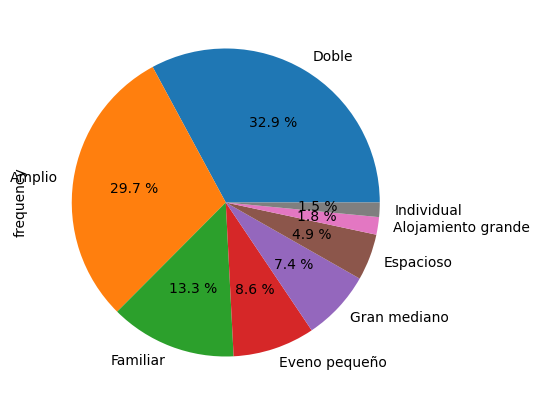

In [75]:
filtro_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**4. bathrooms**

In [76]:
Naples['bathrooms'].info()
n = 11027
max=Naples['bathrooms'].max()
min=Naples['bathrooms'].min()
Limites=[min,max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: bathrooms
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


[1.0, 1.0]

In [77]:
r=max-min
r

0.0

In [78]:
i=r/1
i

0.0

In [79]:
intervalos=np.linspace(0.99, 1, 2)
intervalos 

array([0.99, 1.  ])

In [80]:
categorias=["Con baño"]

In [81]:
Naples['bathrooms'] = pd.cut(x = Naples['bathrooms'], bins=intervalos, labels = categorias)
Naples['bathrooms']

0        Con baño
1        Con baño
2        Con baño
3        Con baño
4        Con baño
           ...   
11022    Con baño
11023    Con baño
11024    Con baño
11025    Con baño
11026    Con baño
Name: bathrooms, Length: 11027, dtype: category
Categories (1, object): ['Con baño']

In [82]:
tabla1=freq_tbl(Naples['bathrooms'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('bathrooms')
filtro_index

,frequency
bathrooms,
Con baño,11027


Text(0, 0.5, 'Frecuencia')

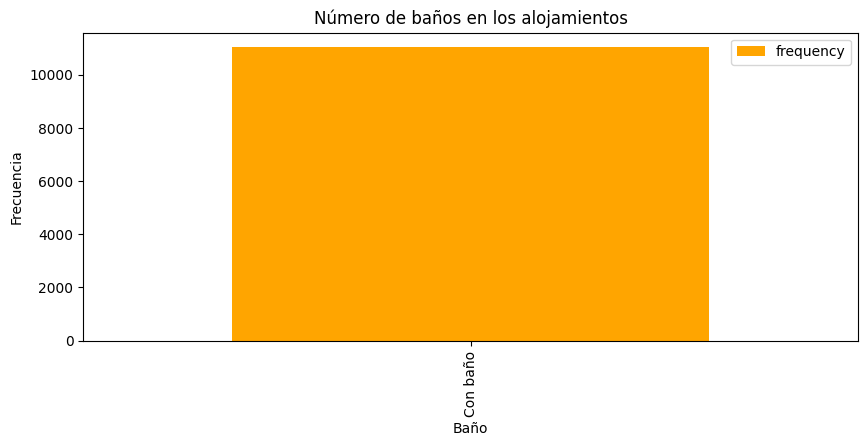

In [83]:
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Número de baños en los alojamientos')
plt.xlabel('Baño')
plt.ylabel('Frecuencia')

**5. beds**

In [84]:
Naples['beds'].info()
n = 11027
max=Naples['beds'].max()
min=Naples['beds'].min()
Limites=[min,max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


[0.0, 6.0]

In [85]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [86]:
r=max-min
r

6.0

In [87]:
i=r/8
i

0.75

In [88]:
intervalos=np.linspace(-0.1, 6.0, 9)
intervalos 

array([-0.1   ,  0.6625,  1.425 ,  2.1875,  2.95  ,  3.7125,  4.475 ,
        5.2375,  6.    ])

In [89]:
categorias=["Sin camas","Una cama","Dos camas","Dos camas y media", "Tres camas", "Cuatro camas", "Cinco camas", "Seis camas"]

In [90]:
Naples['beds'] = pd.cut(x = Naples['beds'], bins=intervalos, labels = categorias)
Naples['beds']

0          Una cama
1          Una cama
2          Una cama
3          Una cama
4         Dos camas
            ...    
11022     Dos camas
11023      Una cama
11024    Tres camas
11025     Dos camas
11026      Una cama
Name: beds, Length: 11027, dtype: category
Categories (8, object): ['Sin camas' < 'Una cama' < 'Dos camas' < 'Dos camas y media' < 'Tres camas' < 'Cuatro camas' < 'Cinco camas' < 'Seis camas']

In [91]:
tabla1=freq_tbl(Naples['beds'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('beds')
filtro_index

,frequency
beds,
Una cama,3601
Dos camas,3585
Tres camas,1638
Cuatro camas,763
Dos camas y media,702
Cinco camas,310
Sin camas,249
Seis camas,179


<Axes: ylabel='frequency'>

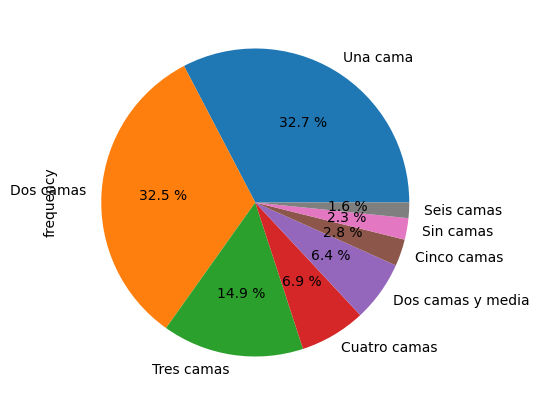

In [92]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

**6. price**

In [93]:
Naples['price'].info()
n = 11027
max=Naples['price'].max()
min=Naples['price'].min()
Limites=[min,max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: price
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


[13.0, 195.0]

In [94]:
r=max-min
r

182.0

In [95]:
i=r/12
i

15.166666666666666

In [96]:
intervalos=np.linspace(13.0, 195.0, 12)
intervalos

array([ 13.        ,  29.54545455,  46.09090909,  62.63636364,
        79.18181818,  95.72727273, 112.27272727, 128.81818182,
       145.36363636, 161.90909091, 178.45454545, 195.        ])

In [97]:
categorias = [
    "Precio no disponible", 
    "Precio muy bajo", 
    "Precio bajo", 
    "Precio razonable", 
    "Precio moderado", 
    "Precio aceptable", 
    "Precio alto", 
    "Precio muy alto", 
    "Precio muy elevado", 
    "Precio elevado", 
    "Precio premium",
]

In [98]:
Naples['price'] = pd.cut(x = Naples['price'], bins=intervalos, labels = categorias)
Naples['price']

0            Precio razonable
1            Precio razonable
2            Precio razonable
3                 Precio bajo
4                 Precio bajo
                 ...         
11022        Precio aceptable
11023        Precio aceptable
11024         Precio moderado
11025             Precio bajo
11026    Precio no disponible
Name: price, Length: 11027, dtype: category
Categories (11, object): ['Precio no disponible' < 'Precio muy bajo' < 'Precio bajo' < 'Precio razonable' ... 'Precio muy alto' < 'Precio muy elevado' < 'Precio elevado' < 'Precio premium']

In [99]:
tabla1=freq_tbl(Naples['price'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('price')
filtro_index

,frequency
price,
Precio moderado,2835
Precio razonable,1963
Precio alto,1459
Precio aceptable,1411
Precio bajo,1387
Precio muy alto,543
Precio muy elevado,442
Precio muy bajo,434
Precio premium,231


Text(0, 0.5, 'Frecuencia')

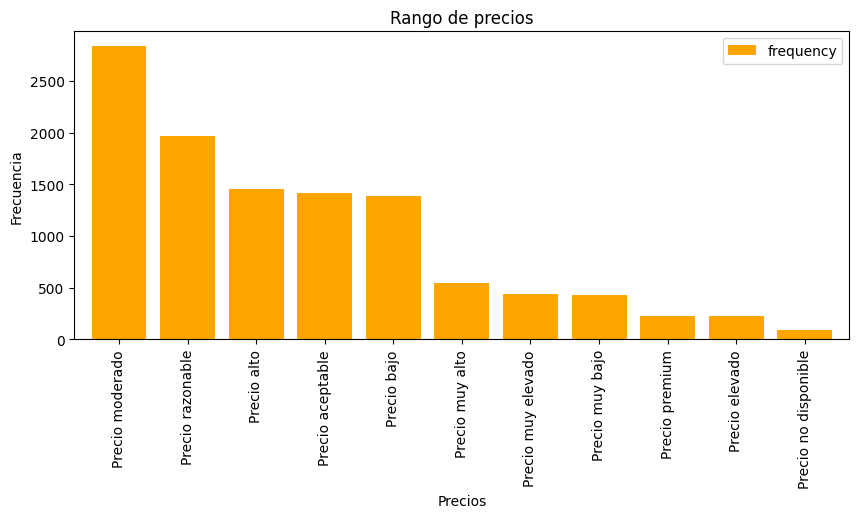

In [100]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Rango de precios')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')

**7. maximum_nights**

In [101]:
Naples['maximum_nights'].info()
n = 11027
max=Naples['maximum_nights'].max()
min=Naples['maximum_nights'].min()
Limites=[min,max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: maximum_nights
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


[1.0, 760.0]

In [102]:
r=max-min
r

759.0

In [103]:
i=r/12
i

63.25

In [104]:
intervalos=np.linspace(0.99, 760.0, 12)
intervalos 

array([  0.99      ,  69.99090909, 138.99181818, 207.99272727,
       276.99363636, 345.99454545, 414.99545455, 483.99636364,
       552.99727273, 621.99818182, 690.99909091, 760.        ])

In [105]:
categorias = [
    "Básico", 
    "Accesible", 
    "Confortable", 
    "Destacado", 
    "Exquisito", 
    "Ideal", 
    "Relajante", 
    "Premium", 
    "Excepcional", 
    "Distinguido", 
    "Máximo"
]

In [106]:
Naples['maximum_nights'] = pd.cut(x = Naples['maximum_nights'], bins=intervalos, labels = categorias)
Naples['maximum_nights']

0        Confortable
1             Básico
2             Básico
3              Ideal
4             Básico
            ...     
11022          Ideal
11023          Ideal
11024         Básico
11025          Ideal
11026          Ideal
Name: maximum_nights, Length: 11027, dtype: category
Categories (11, object): ['Básico' < 'Accesible' < 'Confortable' < 'Destacado' ... 'Premium' < 'Excepcional' < 'Distinguido' < 'Máximo']

In [107]:
tabla1=freq_tbl(Naples['maximum_nights'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('maximum_nights')
filtro_index

,frequency
maximum_nights,
Ideal,4257
Básico,4158
Confortable,2263
Accesible,229
Máximo,80
Exquisito,26
Premium,5
Destacado,4
Relajante,3


Text(0, 0.5, 'Frecuencia')

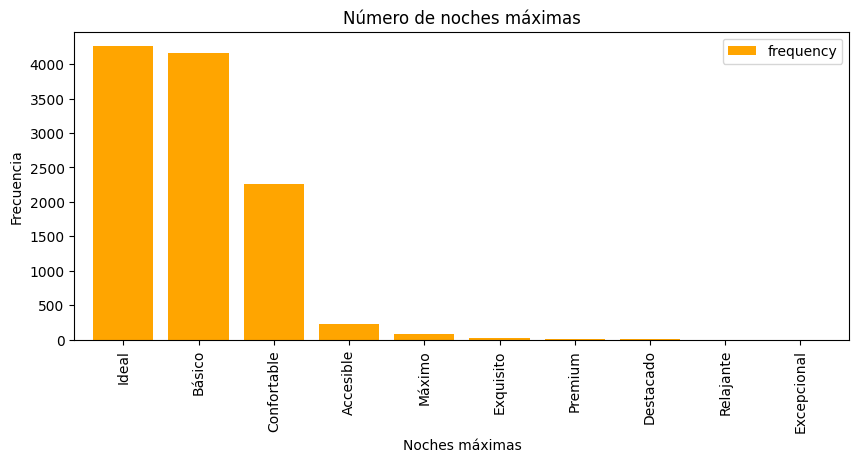

In [108]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Número de noches máximas')
plt.xlabel('Noches máximas')
plt.ylabel('Frecuencia')

**8. availability_365**

In [109]:
Naples['availability_365'].info()
n = 11027
max=Naples['availability_365'].max()
min=Naples['availability_365'].min()
Limites=[min,max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
11027 non-null  int64
dtypes: int64(1)
memory usage: 86.3 KB


[0, 365]

In [110]:
R = max - min
R

365

In [111]:
i = R/12
i

30.416666666666668

In [112]:
intervalos = np.linspace(-0.1, 365, 12)
intervalos

array([-1.00000000e-01,  3.30909091e+01,  6.62818182e+01,  9.94727273e+01,
        1.32663636e+02,  1.65854545e+02,  1.99045455e+02,  2.32236364e+02,
        2.65427273e+02,  2.98618182e+02,  3.31809091e+02,  3.65000000e+02])

In [113]:
categorias = ["No disponible", 
              "Disponibilidad baja", 
              "Disponible en temporadas", 
              "Parcialmete disponible", 
              "Moderadamente disponible", 
              "Disponibilidad promedio", 
              "Buena disponibilidad", 
              "Alta disponibilidad", 
              "Mayormente disponible", 
              "Casi siempre disponible", 
              "Siempre disponible"]

In [114]:
Naples['availability_365'] = pd.cut(x = Naples['availability_365'], bins=intervalos, labels = categorias)
Naples['availability_365']

0              Siempre disponible
1        Disponible en temporadas
2              Siempre disponible
3         Casi siempre disponible
4         Casi siempre disponible
                   ...           
11022          Siempre disponible
11023          Siempre disponible
11024     Disponibilidad promedio
11025    Disponible en temporadas
11026    Disponible en temporadas
Name: availability_365, Length: 11027, dtype: category
Categories (11, object): ['No disponible' < 'Disponibilidad baja' < 'Disponible en temporadas' < 'Parcialmete disponible' ... 'Alta disponibilidad' < 'Mayormente disponible' < 'Casi siempre disponible' < 'Siempre disponible']

In [115]:
tabla1=freq_tbl(Naples['availability_365'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('availability_365')
filtro_index

,frequency
availability_365,
Siempre disponible,2777
Casi siempre disponible,1232
Alta disponibilidad,998
Disponible en temporadas,987
Mayormente disponible,963
No disponible,854
Moderadamente disponible,752
Disponibilidad baja,650
Parcialmete disponible,630


Text(0, 0.5, 'Frecuencia')

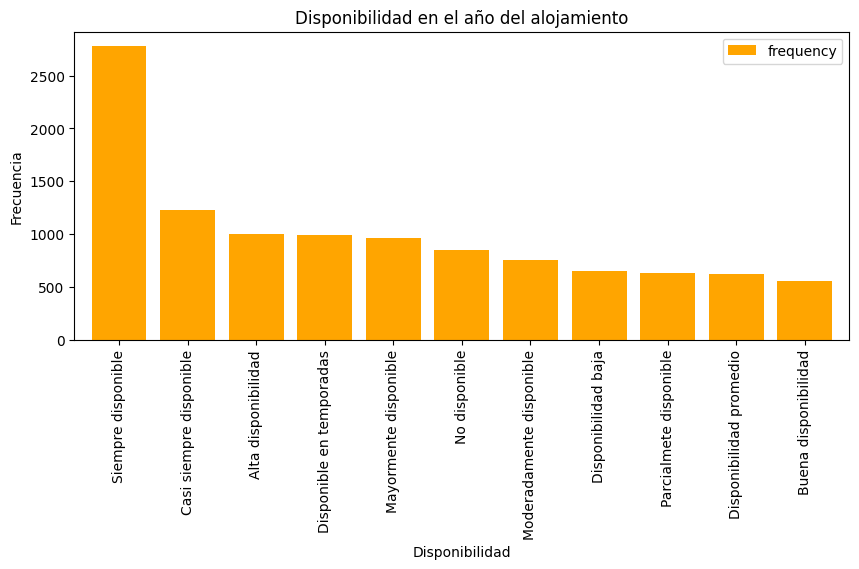

In [116]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Disponibilidad en el año del alojamiento')
plt.xlabel('Disponibilidad')
plt.ylabel('Frecuencia')

**9. host_response_rate**

In [117]:
Naples['host_response_rate'].info()
n = 11027
max=Naples['host_response_rate'].max()
min=Naples['host_response_rate'].min()
Limites=[min,max]
Limites

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


[1.0, 1.0]

In [118]:
R = max - min
R

0.0

In [119]:
i = R/12
i

0.0

In [120]:
intervalos = np.linspace(0.99, 1, 2)
intervalos

array([0.99, 1.  ])

In [121]:
categorias = ["Atención inmediata"]

In [122]:
Naples['host_response_rate'] = pd.cut(x = Naples['host_response_rate'], bins=intervalos, labels = categorias)
Naples['host_response_rate']

0        Atención inmediata
1        Atención inmediata
2        Atención inmediata
3        Atención inmediata
4        Atención inmediata
                ...        
11022    Atención inmediata
11023    Atención inmediata
11024    Atención inmediata
11025    Atención inmediata
11026    Atención inmediata
Name: host_response_rate, Length: 11027, dtype: category
Categories (1, object): ['Atención inmediata']

In [123]:
tabla1=freq_tbl(Naples['host_response_rate'])
tabla1=tabla1.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla1[tabla1['frequency']>1]
filtro_index=filtro.set_index('host_response_rate')
filtro_index

,frequency
host_response_rate,
Atención inmediata,11027


Text(0, 0.5, 'Frecuencia')

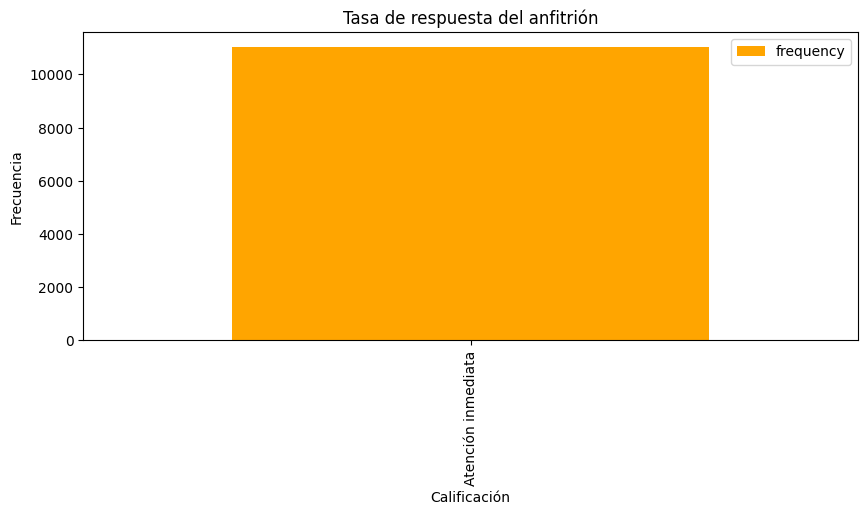

In [124]:
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Tasa de respuesta del anfitrión')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

**10. number_of_reviews**

In [125]:
# Calculamos el numero total de la poblacion "n"
Naples['number_of_reviews'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [126]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['number_of_reviews'].max()
Min = Naples['number_of_reviews'].min()
Limites = [Min, Max]
Limites

[0.0, 91.0]

In [127]:
# Calculamos el rango R
R = Max - Min
R

91.0

In [128]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [129]:
# Caluclamos el ancho del intervalo "i"
i = R/12
i

7.583333333333333

**Creacion de Categorias a partir de clases**

In [130]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(-0.1, 91.0, 12)
# intervalos = np.linspace(0.99, 91.0, 12)
intervalos

array([-0.1       ,  8.18181818, 16.46363636, 24.74545455, 33.02727273,
       41.30909091, 49.59090909, 57.87272727, 66.15454545, 74.43636364,
       82.71818182, 91.        ])

In [131]:
# Creamos las categorias
categorias = ["Sin o muy pocas reseñas", 
              "Baja cantidad de reseñas", 
              "Algunas reseñas", 
              "Moderada cantidad de reseñas", 
              "Reseñas frecuentes", 
              "Buena cantidad de reseñas", 
              "Alta actividad de reseñas", 
              "Muy alta actividad de reseñas", 
              "Reseñas constantes", 
              "Extremadamente alta actividad", 
              "Popularidad máxima"]

In [132]:
# Finalmente creamos las categorias en la columna númerica
Naples['number_of_reviews'] = pd.cut(x = Naples['number_of_reviews'], bins=intervalos, labels = categorias)
Naples['number_of_reviews']

0              Sin o muy pocas reseñas
1                      Algunas reseñas
2             Baja cantidad de reseñas
3             Baja cantidad de reseñas
4        Muy alta actividad de reseñas
                     ...              
11022          Sin o muy pocas reseñas
11023          Sin o muy pocas reseñas
11024          Sin o muy pocas reseñas
11025          Sin o muy pocas reseñas
11026          Sin o muy pocas reseñas
Name: number_of_reviews, Length: 11027, dtype: category
Categories (11, object): ['Sin o muy pocas reseñas' < 'Baja cantidad de reseñas' < 'Algunas reseñas' < 'Moderada cantidad de reseñas' ... 'Muy alta actividad de reseñas' < 'Reseñas constantes' < 'Extremadamente alta actividad' < 'Popularidad máxima']

In [133]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['number_of_reviews'])
tabla2

,number_of_reviews,frequency,percentage,cumulative_perc
0,Sin o muy pocas reseñas,5916,0.536501,0.536501
1,Baja cantidad de reseñas,2368,0.214746,0.751247
2,Algunas reseñas,636,0.057677,0.808924
3,Moderada cantidad de reseñas,565,0.051238,0.860161
4,Reseñas frecuentes,366,0.033191,0.893353
5,Buena cantidad de reseñas,309,0.028022,0.921375
6,Alta actividad de reseñas,215,0.019498,0.940872
7,Muy alta actividad de reseñas,197,0.017865,0.958738
8,Reseñas constantes,167,0.015145,0.973882
9,Extremadamente alta actividad,150,0.013603,0.987485


In [134]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,number_of_reviews,frequency,percentage,cumulative_perc
0,Sin o muy pocas reseñas,5916,0.536501,0.536501
1,Baja cantidad de reseñas,2368,0.214746,0.751247
2,Algunas reseñas,636,0.057677,0.808924
3,Moderada cantidad de reseñas,565,0.051238,0.860161
4,Reseñas frecuentes,366,0.033191,0.893353
5,Buena cantidad de reseñas,309,0.028022,0.921375
6,Alta actividad de reseñas,215,0.019498,0.940872
7,Muy alta actividad de reseñas,197,0.017865,0.958738
8,Reseñas constantes,167,0.015145,0.973882
9,Extremadamente alta actividad,150,0.013603,0.987485


In [135]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('number_of_reviews')
filtro_index

,frequency,percentage,cumulative_perc
number_of_reviews,,,
Sin o muy pocas reseñas,5916,0.536501,0.536501
Baja cantidad de reseñas,2368,0.214746,0.751247
Algunas reseñas,636,0.057677,0.808924
Moderada cantidad de reseñas,565,0.051238,0.860161
Reseñas frecuentes,366,0.033191,0.893353
Buena cantidad de reseñas,309,0.028022,0.921375
Alta actividad de reseñas,215,0.019498,0.940872
Muy alta actividad de reseñas,197,0.017865,0.958738
Reseñas constantes,167,0.015145,0.973882


Text(0, 0.5, 'Frecuencia')

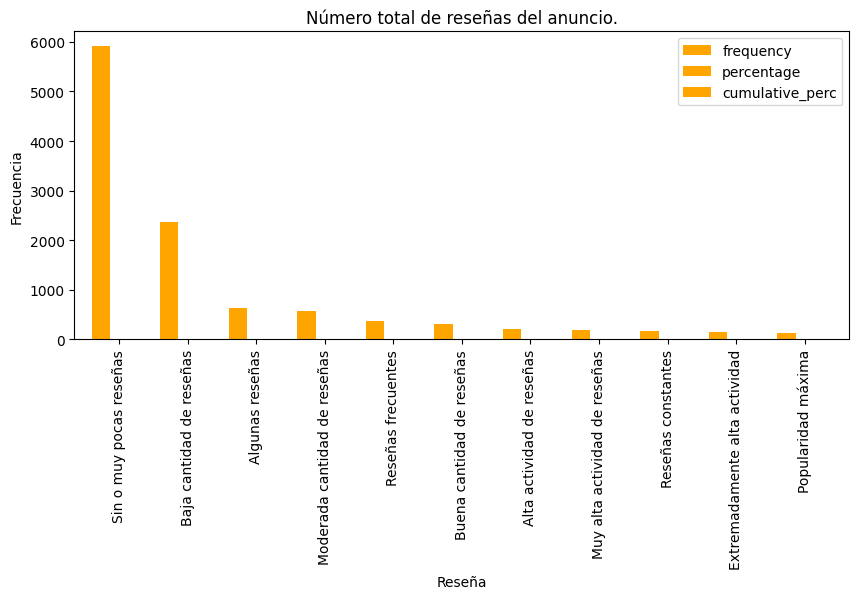

In [136]:
# Realizamos grafico pde barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Número total de reseñas del anuncio.')
plt.xlabel('Reseña')
plt.ylabel('Frecuencia')

**11. review_scores_location**

In [137]:
# Calculamos el numero total de la poblacion "n"
Naples['review_scores_location'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [138]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['review_scores_location'].max()
Min = Naples['review_scores_location'].min()
Limites = [Min, Max]
Limites

[4.28, 5.0]

In [139]:
# Calculamos el rango R
R = Max - Min
R

0.7199999999999998

In [140]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [141]:
# Caluclamos el ancho del intervalo "i"
i = R/12
i

0.05999999999999998

**Creacion de Categorias a partir de clases**

In [142]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(4.28, 5.0, 12)
intervalos

array([4.28      , 4.34545455, 4.41090909, 4.47636364, 4.54181818,
       4.60727273, 4.67272727, 4.73818182, 4.80363636, 4.86909091,
       4.93454545, 5.        ])

In [143]:
categorias = ["Muy Mala", 
              "Mala", 
              "Deficiente", 
              "Regular", 
              "Aceptable", 
              "Promedio", 
              "Buena", 
              "Muy Buena", 
              "Excelente", 
              "Destacada", 
              "Perfecta"]

In [144]:
# Finalmente creamos las categorias en la columna númerica
Naples['review_scores_location'] = pd.cut(x = Naples['review_scores_location'], bins=intervalos, labels = categorias)
Naples['review_scores_location']

0          Perfecta
1        Deficiente
2             Buena
3         Excelente
4         Destacada
            ...    
11022     Muy Buena
11023     Muy Buena
11024     Muy Buena
11025     Muy Buena
11026     Muy Buena
Name: review_scores_location, Length: 11027, dtype: category
Categories (11, object): ['Muy Mala' < 'Mala' < 'Deficiente' < 'Regular' ... 'Muy Buena' < 'Excelente' < 'Destacada' < 'Perfecta']

In [145]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['review_scores_location'])
tabla2

,review_scores_location,frequency,percentage,cumulative_perc
0,Muy Buena,4259,0.386234,0.386514
1,Perfecta,2567,0.232792,0.619475
2,Destacada,988,0.089598,0.709139
3,Excelente,700,0.063481,0.772665
4,Promedio,595,0.053958,0.826663
5,Regular,509,0.046159,0.872856
6,Buena,467,0.042351,0.915237
7,Aceptable,363,0.032919,0.948180
8,Mala,196,0.017775,0.965968
9,Deficiente,188,0.017049,0.983029


In [146]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,review_scores_location,frequency,percentage,cumulative_perc
0,Muy Buena,4259,0.386234,0.386514
1,Perfecta,2567,0.232792,0.619475
2,Destacada,988,0.089598,0.709139
3,Excelente,700,0.063481,0.772665
4,Promedio,595,0.053958,0.826663
5,Regular,509,0.046159,0.872856
6,Buena,467,0.042351,0.915237
7,Aceptable,363,0.032919,0.948180
8,Mala,196,0.017775,0.965968
9,Deficiente,188,0.017049,0.983029


In [147]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('review_scores_location')
filtro_index

,frequency,percentage,cumulative_perc
review_scores_location,,,
Muy Buena,4259,0.386234,0.386514
Perfecta,2567,0.232792,0.619475
Destacada,988,0.089598,0.709139
Excelente,700,0.063481,0.772665
Promedio,595,0.053958,0.826663
Regular,509,0.046159,0.872856
Buena,467,0.042351,0.915237
Aceptable,363,0.032919,0.948180
Mala,196,0.017775,0.965968


<Axes: ylabel='frequency'>

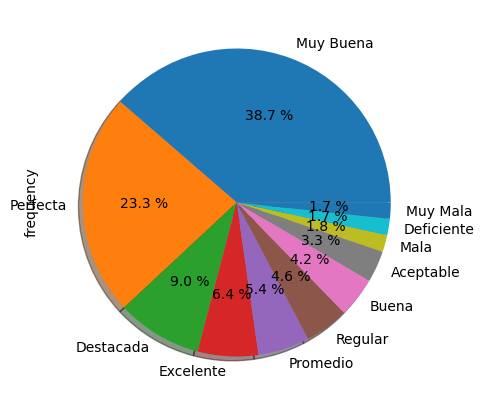

In [148]:
# Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**12. review_scores_value**

In [3]:
# Calculamos el numero total de la poblacion "n"
Naples['review_scores_value'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [4]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['review_scores_value'].max()
Min = Naples['review_scores_value'].min()
Limites = [Min, Max]
Limites

[4.33, 5.0]

In [5]:
# Calculamos el rango R
R = Max - Min
R

0.6699999999999999

In [6]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [7]:
# Caluclamos el ancho del intervalo "i"
i = R/12
i

0.055833333333333325

**Creacion de Categorias a partir de clases**

In [8]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(4.33, 5.0, 12)
intervalos 

array([4.33      , 4.39090909, 4.45181818, 4.51272727, 4.57363636,
       4.63454545, 4.69545455, 4.75636364, 4.81727273, 4.87818182,
       4.93909091, 5.        ])

In [9]:
categorias = ["Muy Mala", 
              "Mala", 
              "Deficiente", 
              "Regular", 
              "Aceptable", 
              "Promedio", 
              "Buena", 
              "Muy Buena", 
              "Excelente", 
              "Destacada", 
              "Perfecta"]

In [10]:
# Finalmente creamos las categorias en la columna númerica
Naples['review_scores_value'] = pd.cut(x = Naples['review_scores_value'], bins=intervalos, labels = categorias)
Naples['review_scores_value']

0         Promedio
1          Regular
2         Promedio
3        Destacada
4         Perfecta
           ...    
11022    Muy Buena
11023    Muy Buena
11024    Muy Buena
11025    Muy Buena
11026    Muy Buena
Name: review_scores_value, Length: 11027, dtype: category
Categories (11, object): ['Muy Mala' < 'Mala' < 'Deficiente' < 'Regular' ... 'Muy Buena' < 'Excelente' < 'Destacada' < 'Perfecta']

In [11]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['review_scores_value'])
tabla2

,review_scores_value,frequency,percentage,cumulative_perc
0,Muy Buena,4323,0.392038,0.395047
1,Perfecta,2082,0.188809,0.585306
2,Excelente,865,0.078444,0.664352
3,Buena,817,0.074091,0.739011
4,Destacada,701,0.063571,0.803070
5,Promedio,652,0.059128,0.862652
6,Deficiente,467,0.042351,0.905328
7,Aceptable,437,0.039630,0.945262
8,Regular,282,0.025574,0.971032
9,Mala,191,0.017321,0.988486


In [12]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
tabla2=tabla2.drop(['percentage','cumulative_perc'], axis=1)
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,review_scores_value,frequency
0,Muy Buena,4323
1,Perfecta,2082
2,Excelente,865
3,Buena,817
4,Destacada,701
5,Promedio,652
6,Deficiente,467
7,Aceptable,437
8,Regular,282
9,Mala,191


In [13]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('review_scores_value')
filtro_index

,frequency
review_scores_value,
Muy Buena,4323
Perfecta,2082
Excelente,865
Buena,817
Destacada,701
Promedio,652
Deficiente,467
Aceptable,437
Regular,282


Text(0, 0.5, 'Frecuencia')

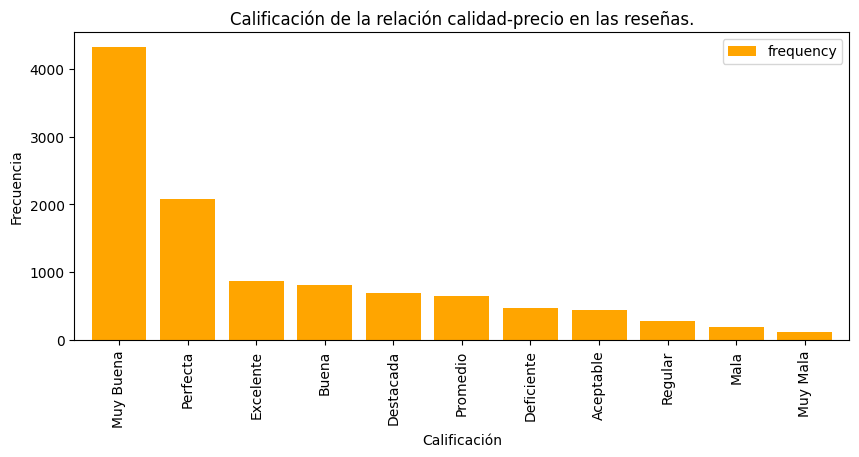

In [14]:
# Realizamos grafico pde barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Calificación de la relación calidad-precio en las reseñas.')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

**13. reviews_per_month**

In [161]:
# Calculamos el numero total de la poblacion "n"
Naples['reviews_per_month'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [162]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['reviews_per_month'].max()
Min = Naples['reviews_per_month'].min()
Limites = [Min, Max]
Limites

[0.01, 3.64]

In [163]:
# Calculamos el rango R
R = Max - Min
R

3.6300000000000003

In [164]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [ ]:
# Caluclamos el ancho del intervalo "i"
i = R/12
i

0.30250000000000005

**Creación de Categorias a partir de clases**

In [166]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(0.01, 3.64, 12)
intervalos

array([0.01, 0.34, 0.67, 1.  , 1.33, 1.66, 1.99, 2.32, 2.65, 2.98, 3.31,
       3.64])

In [167]:
categorias = ["Sin reseñas frecuentes", 
              "Muy pocas reseñas", 
              "Pocas reseñas", 
              "Algunas reseñas", 
              "Moderadas reseñas", 
              "Frecuentes reseñas", 
              "Reseñas constantes", 
              "Muchas reseñas", 
              "Muy alta actividad", 
              "Extremadamente alto", 
              "Popularidad máxima"]

In [168]:
# Finalmente creamos las categorias en la columna númerica
Naples['reviews_per_month'] = pd.cut(x = Naples['reviews_per_month'], bins=intervalos, labels = categorias)
Naples['reviews_per_month']

0        Sin reseñas frecuentes
1        Sin reseñas frecuentes
2                 Pocas reseñas
3            Frecuentes reseñas
4             Muy pocas reseñas
                  ...          
11022             Pocas reseñas
11023             Pocas reseñas
11024             Pocas reseñas
11025             Pocas reseñas
11026             Pocas reseñas
Name: reviews_per_month, Length: 11027, dtype: category
Categories (11, object): ['Sin reseñas frecuentes' < 'Muy pocas reseñas' < 'Pocas reseñas' < 'Algunas reseñas' ... 'Muchas reseñas' < 'Muy alta actividad' < 'Extremadamente alto' < 'Popularidad máxima']

In [169]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['reviews_per_month'])
tabla2

,reviews_per_month,frequency,percentage,cumulative_perc
0,Pocas reseñas,4278,0.387957,0.389228
1,Sin reseñas frecuentes,2397,0.217376,0.607315
2,Muy pocas reseñas,1261,0.114356,0.722045
3,Algunas reseñas,644,0.058402,0.780639
4,Moderadas reseñas,496,0.044981,0.825767
5,Frecuentes reseñas,434,0.039358,0.865253
6,Reseñas constantes,416,0.037726,0.903103
7,Muchas reseñas,344,0.031196,0.934401
8,Muy alta actividad,305,0.027659,0.962151
9,Extremadamente alto,251,0.022762,0.984988


In [170]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,reviews_per_month,frequency,percentage,cumulative_perc
0,Pocas reseñas,4278,0.387957,0.389228
1,Sin reseñas frecuentes,2397,0.217376,0.607315
2,Muy pocas reseñas,1261,0.114356,0.722045
3,Algunas reseñas,644,0.058402,0.780639
4,Moderadas reseñas,496,0.044981,0.825767
5,Frecuentes reseñas,434,0.039358,0.865253
6,Reseñas constantes,416,0.037726,0.903103
7,Muchas reseñas,344,0.031196,0.934401
8,Muy alta actividad,305,0.027659,0.962151
9,Extremadamente alto,251,0.022762,0.984988


In [171]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('reviews_per_month')
filtro_index

,frequency,percentage,cumulative_perc
reviews_per_month,,,
Pocas reseñas,4278,0.387957,0.389228
Sin reseñas frecuentes,2397,0.217376,0.607315
Muy pocas reseñas,1261,0.114356,0.722045
Algunas reseñas,644,0.058402,0.780639
Moderadas reseñas,496,0.044981,0.825767
Frecuentes reseñas,434,0.039358,0.865253
Reseñas constantes,416,0.037726,0.903103
Muchas reseñas,344,0.031196,0.934401
Muy alta actividad,305,0.027659,0.962151


<Axes: ylabel='frequency'>

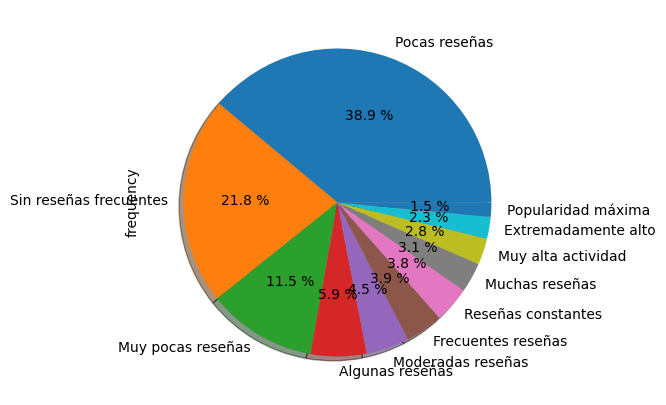

In [172]:
# Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**14. review_scores_communication**

In [173]:
# Calculamos el numero total de la poblacion "n"
Naples['review_scores_communication'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [174]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['review_scores_communication'].max()
Min = Naples['review_scores_communication'].min()
Limites = [Min, Max]
Limites

[4.7, 5.0]

In [175]:
# Calculamos el rango R
R = Max - Min
R

0.2999999999999998

In [176]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [177]:
# Caluclamos el ancho del intervalo "i"
i = R/12
i

0.024999999999999984

**Creación de Categorias a partir de clases**

In [178]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(4.7, 5.0, 12)
intervalos

array([4.7       , 4.72727273, 4.75454545, 4.78181818, 4.80909091,
       4.83636364, 4.86363636, 4.89090909, 4.91818182, 4.94545455,
       4.97272727, 5.        ])

In [179]:
categorias = ["Comunicación deficiente", 
              "Muy mala comunicación", 
              "Comunicación insuficiente", 
              "Regular", 
              "Aceptable", 
              "Buena comunicación", 
              "Muy buena comunicación", 
              "Excelente comunicación", 
              "Comunicación destacada", 
              "Casi perfecta", 
              "Comunicación impecable"]

In [180]:
# Finalmente creamos las categorias en la columna númerica
Naples['review_scores_communication'] = pd.cut(x = Naples['review_scores_communication'], bins=intervalos, labels = categorias)
Naples['review_scores_communication']

0           Comunicación impecable
1        Comunicación insuficiente
2                        Aceptable
3                    Casi perfecta
4           Comunicación impecable
                   ...            
11022       Comunicación impecable
11023       Comunicación impecable
11024       Comunicación impecable
11025       Comunicación impecable
11026       Comunicación impecable
Name: review_scores_communication, Length: 11027, dtype: category
Categories (11, object): ['Comunicación deficiente' < 'Muy mala comunicación' < 'Comunicación insuficiente' < 'Regular' ... 'Excelente comunicación' < 'Comunicación destacada' < 'Casi perfecta' < 'Comunicación impecable']

In [181]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['review_scores_communication'])
tabla2

,review_scores_communication,frequency,percentage,cumulative_perc
0,Comunicación impecable,7464,0.676884,0.679163
1,Casi perfecta,732,0.066383,0.745769
2,Comunicación destacada,713,0.064659,0.810646
3,Muy buena comunicación,461,0.041806,0.852593
4,Buena comunicación,369,0.033463,0.886169
5,Excelente comunicación,321,0.029110,0.915378
6,Aceptable,279,0.025302,0.940764
7,Muy mala comunicación,205,0.018591,0.959418
8,Comunicación insuficiente,185,0.016777,0.976251
9,Regular,175,0.015870,0.992175


In [182]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,review_scores_communication,frequency,percentage,cumulative_perc
0,Comunicación impecable,7464,0.676884,0.679163
1,Casi perfecta,732,0.066383,0.745769
2,Comunicación destacada,713,0.064659,0.810646
3,Muy buena comunicación,461,0.041806,0.852593
4,Buena comunicación,369,0.033463,0.886169
5,Excelente comunicación,321,0.029110,0.915378
6,Aceptable,279,0.025302,0.940764
7,Muy mala comunicación,205,0.018591,0.959418
8,Comunicación insuficiente,185,0.016777,0.976251
9,Regular,175,0.015870,0.992175


In [183]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('review_scores_communication')
filtro_index

,frequency,percentage,cumulative_perc
review_scores_communication,,,
Comunicación impecable,7464,0.676884,0.679163
Casi perfecta,732,0.066383,0.745769
Comunicación destacada,713,0.064659,0.810646
Muy buena comunicación,461,0.041806,0.852593
Buena comunicación,369,0.033463,0.886169
Excelente comunicación,321,0.029110,0.915378
Aceptable,279,0.025302,0.940764
Muy mala comunicación,205,0.018591,0.959418
Comunicación insuficiente,185,0.016777,0.976251


Text(0, 0.5, 'Frecuencia')

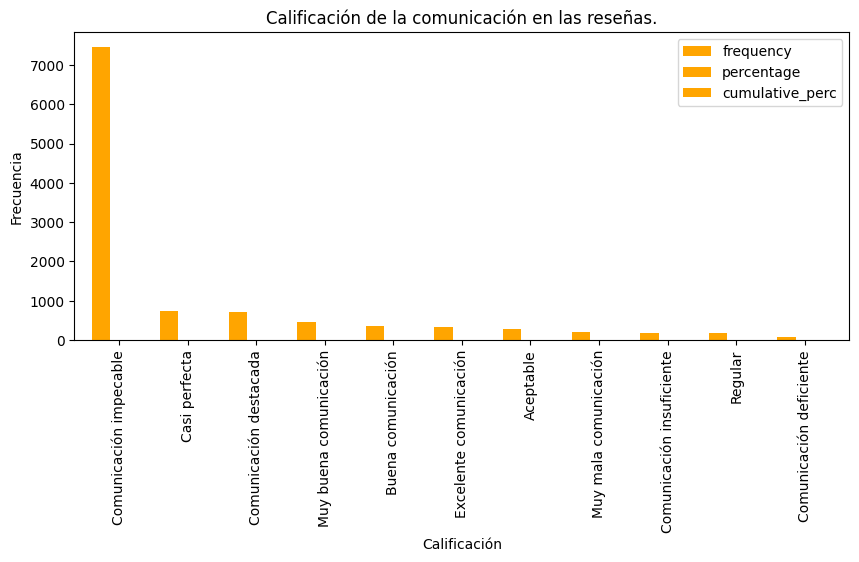

In [184]:
# Realizamos grafico pde barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Calificación de la comunicación en las reseñas.')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

**15. review_scores_checkin**

In [185]:
# Calculamos el numero total de la poblacion "n"
Naples['review_scores_checkin'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: review_scores_checkin
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [186]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['review_scores_checkin'].max()
Min = Naples['review_scores_checkin'].min()
Limites = [Min, Max]
Limites

[4.57, 5.0]

In [187]:
# Calculamos el rango R
R = Max - Min
R

0.4299999999999997

In [188]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [189]:
# Calculamos el ancho del intervalo "i"
i = R/12
i

0.03583333333333331

**Creación de Categorias a partir de clases**

In [190]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(4.57, 5.0, 12)
intervalos

array([4.57      , 4.60909091, 4.64818182, 4.68727273, 4.72636364,
       4.76545455, 4.80454545, 4.84363636, 4.88272727, 4.92181818,
       4.96090909, 5.        ])

In [191]:
categorias = ["Registro deficiente", 
              "Registro muy malo", 
              "Registro insuficiente", 
              "Regular", 
              "Aceptable", 
              "Buen registro", 
              "Muy buen registro", 
              "Excelente registro", 
              "Registro destacado", 
              "Casi perfecto", 
              "Registro impecable"]


In [192]:
# Finalmente creamos las categorias en la columna númerica
Naples['review_scores_checkin'] = pd.cut(x = Naples['review_scores_checkin'], bins=intervalos, labels = categorias)
Naples['review_scores_checkin']

0        Registro insuficiente
1            Muy buen registro
2           Registro destacado
3                Casi perfecto
4           Registro destacado
                 ...          
11022       Registro destacado
11023       Registro destacado
11024       Registro destacado
11025       Registro destacado
11026       Registro destacado
Name: review_scores_checkin, Length: 11027, dtype: category
Categories (11, object): ['Registro deficiente' < 'Registro muy malo' < 'Registro insuficiente' < 'Regular' ... 'Excelente registro' < 'Registro destacado' < 'Casi perfecto' < 'Registro impecable']

In [193]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['review_scores_checkin'])
tabla2

,review_scores_checkin,frequency,percentage,cumulative_perc
0,Registro destacado,4307,0.390587,0.391581
1,Registro impecable,3116,0.282579,0.674880
2,Casi perfecto,859,0.077900,0.752978
3,Excelente registro,695,0.063027,0.816165
4,Muy buen registro,495,0.044890,0.861169
5,Buen registro,459,0.041625,0.902900
6,Aceptable,334,0.030289,0.933267
7,Registro insuficiente,281,0.025483,0.958814
8,Regular,225,0.020404,0.979271
9,Registro muy malo,122,0.011064,0.990363


In [194]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,review_scores_checkin,frequency,percentage,cumulative_perc
0,Registro destacado,4307,0.390587,0.391581
1,Registro impecable,3116,0.282579,0.674880
2,Casi perfecto,859,0.077900,0.752978
3,Excelente registro,695,0.063027,0.816165
4,Muy buen registro,495,0.044890,0.861169
5,Buen registro,459,0.041625,0.902900
6,Aceptable,334,0.030289,0.933267
7,Registro insuficiente,281,0.025483,0.958814
8,Regular,225,0.020404,0.979271
9,Registro muy malo,122,0.011064,0.990363


In [195]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('review_scores_checkin')
filtro_index

,frequency,percentage,cumulative_perc
review_scores_checkin,,,
Registro destacado,4307,0.390587,0.391581
Registro impecable,3116,0.282579,0.674880
Casi perfecto,859,0.077900,0.752978
Excelente registro,695,0.063027,0.816165
Muy buen registro,495,0.044890,0.861169
Buen registro,459,0.041625,0.902900
Aceptable,334,0.030289,0.933267
Registro insuficiente,281,0.025483,0.958814
Regular,225,0.020404,0.979271


Text(0, 0.5, 'Frecuencia')

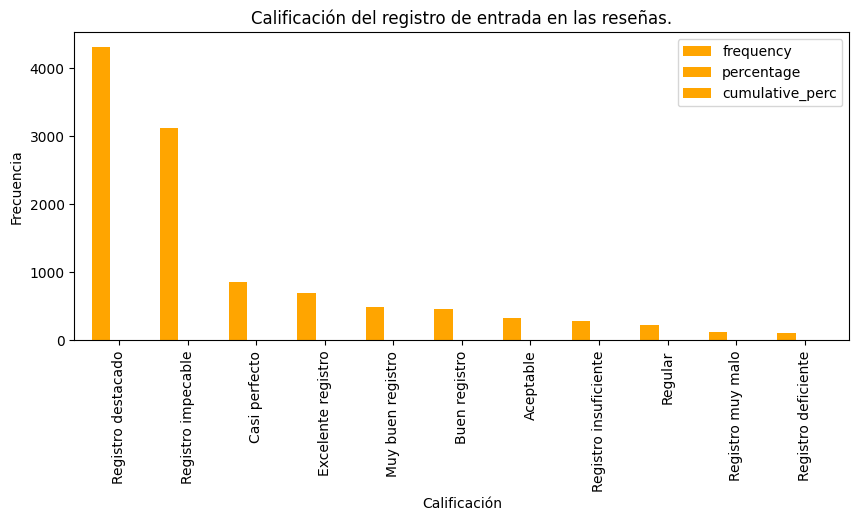

In [196]:
# Realizamos grafico pde barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Calificación del registro de entrada en las reseñas.')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

**16. review_scores_cleanliness**

In [197]:
# Calculamos el numero total de la poblacion "n"
Naples['review_scores_cleanliness'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: review_scores_cleanliness
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [198]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['review_scores_cleanliness'].max()
Min = Naples['review_scores_cleanliness'].min()
Limites = [Min, Max]
Limites

[4.39, 5.0]

In [199]:
# Calculamos el rango R
R = Max - Min
R

0.6100000000000003

In [200]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [201]:
# Calculamos el ancho del intervalo "i"
i = R/12
i

0.05083333333333336

**Creación de Categorias a partir de clases**

In [202]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(4.39, 5.0, 12)
intervalos

array([4.39      , 4.44545455, 4.50090909, 4.55636364, 4.61181818,
       4.66727273, 4.72272727, 4.77818182, 4.83363636, 4.88909091,
       4.94454545, 5.        ])

In [203]:
categorias = [
    "Muy sucio", 
    "Sucio", 
    "Poco limpio", 
    "Regularmente limpio", 
    "Limpio", 
    "Bastante limpio", 
    "Muy limpio", 
    "Excelente limpieza", 
    "Impecable", 
    "Casi perfecto", 
    "Limpieza impecable"
]

In [204]:
# Finalmente creamos las categorias en la columna númerica
Naples['review_scores_cleanliness'] = pd.cut(x = Naples['review_scores_cleanliness'], bins=intervalos, labels = categorias)
Naples['review_scores_cleanliness']

0        Limpieza impecable
1           Bastante limpio
2                     Sucio
3             Casi perfecto
4             Casi perfecto
                ...        
11022         Casi perfecto
11023         Casi perfecto
11024         Casi perfecto
11025         Casi perfecto
11026         Casi perfecto
Name: review_scores_cleanliness, Length: 11027, dtype: category
Categories (11, object): ['Muy sucio' < 'Sucio' < 'Poco limpio' < 'Regularmente limpio' ... 'Excelente limpieza' < 'Impecable' < 'Casi perfecto' < 'Limpieza impecable']

In [205]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['review_scores_cleanliness'])
tabla2

,review_scores_cleanliness,frequency,percentage,cumulative_perc
0,Casi perfecto,4245,0.384964,0.385244
1,Limpieza impecable,3314,0.300535,0.685997
2,Excelente limpieza,722,0.065476,0.751520
3,Impecable,715,0.064841,0.816408
4,Bastante limpio,512,0.046431,0.862873
5,Muy limpio,431,0.039086,0.901987
6,Sucio,334,0.030289,0.932299
7,Regularmente limpio,265,0.024032,0.956348
8,Limpio,237,0.021493,0.977856
9,Poco limpio,123,0.011154,0.989019


In [206]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,review_scores_cleanliness,frequency,percentage,cumulative_perc
0,Casi perfecto,4245,0.384964,0.385244
1,Limpieza impecable,3314,0.300535,0.685997
2,Excelente limpieza,722,0.065476,0.751520
3,Impecable,715,0.064841,0.816408
4,Bastante limpio,512,0.046431,0.862873
5,Muy limpio,431,0.039086,0.901987
6,Sucio,334,0.030289,0.932299
7,Regularmente limpio,265,0.024032,0.956348
8,Limpio,237,0.021493,0.977856
9,Poco limpio,123,0.011154,0.989019


In [207]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('review_scores_cleanliness')
filtro_index

,frequency,percentage,cumulative_perc
review_scores_cleanliness,,,
Casi perfecto,4245,0.384964,0.385244
Limpieza impecable,3314,0.300535,0.685997
Excelente limpieza,722,0.065476,0.751520
Impecable,715,0.064841,0.816408
Bastante limpio,512,0.046431,0.862873
Muy limpio,431,0.039086,0.901987
Sucio,334,0.030289,0.932299
Regularmente limpio,265,0.024032,0.956348
Limpio,237,0.021493,0.977856


<Axes: ylabel='frequency'>

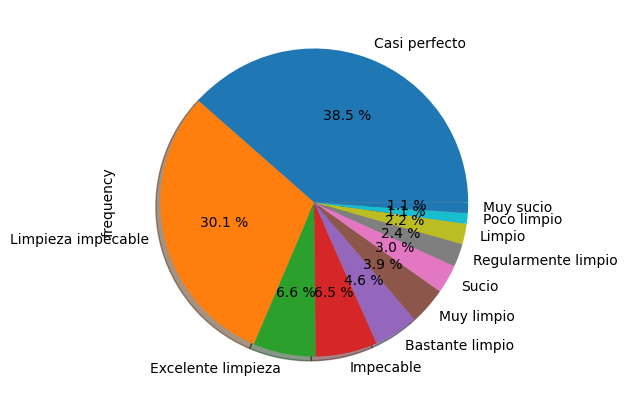

In [208]:
# Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**17. review_scores_accuracy**

In [209]:
# Calculamos el numero total de la poblacion "n"
Naples['review_scores_accuracy'].info()
n = 11027

<class 'pandas.core.series.Series'>
RangeIndex: 11027 entries, 0 to 11026
Series name: review_scores_accuracy
Non-Null Count  Dtype  
--------------  -----  
11027 non-null  float64
dtypes: float64(1)
memory usage: 86.3 KB


In [210]:
# Obtenemos el limite superior y el lim de la columna objetivo
Max = Naples['review_scores_accuracy'].max()
Min = Naples['review_scores_accuracy'].min()
Limites = [Min, Max]
Limites

[4.49, 5.0]

In [211]:
# Calculamos el rango R
R = Max - Min
R

0.5099999999999998

In [212]:
# Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

14.420958483586745

In [213]:
# Calculamos el ancho del intervalo "i"
i = R/12
i

0.04249999999999998

**Creación de Categorias a partir de clases**

In [214]:
# Categorizacion de variables (min, max, cuantas clases voy a tener (8+1 clase mas)) Numero de intervalos
intervalos = np.linspace(4.49, 5.0, 12)
intervalos

array([4.49      , 4.53636364, 4.58272727, 4.62909091, 4.67545455,
       4.72181818, 4.76818182, 4.81454545, 4.86090909, 4.90727273,
       4.95363636, 5.        ])

In [215]:
categorias = [
    "Baja precisión", 
    "Precisión insuficiente", 
    "Precisión regular", 
    "Precisión aceptable", 
    "Precisión buena", 
    "Alta precisión", 
    "Muy alta precisión", 
    "Excelente precisión", 
    "Precisión impecable", 
    "Casi perfecta precisión", 
    "Precisión perfecta"
]

In [216]:
# Finalmente creamos las categorias en la columna númerica
Naples['review_scores_accuracy'] = pd.cut(x = Naples['review_scores_accuracy'], bins=intervalos, labels = categorias)
Naples['review_scores_accuracy']

0        Precisión aceptable
1        Excelente precisión
2         Muy alta precisión
3        Precisión impecable
4        Precisión impecable
                ...         
11022    Precisión impecable
11023    Precisión impecable
11024    Precisión impecable
11025    Precisión impecable
11026    Precisión impecable
Name: review_scores_accuracy, Length: 11027, dtype: category
Categories (11, object): ['Baja precisión' < 'Precisión insuficiente' < 'Precisión regular' < 'Precisión aceptable' ... 'Excelente precisión' < 'Precisión impecable' < 'Casi perfecta precisión' < 'Precisión perfecta']

In [217]:
# Obtengo un analisis univariado de una variable en especifico
tabla2 = freq_tbl(Naples['review_scores_accuracy'])
tabla2

,review_scores_accuracy,frequency,percentage,cumulative_perc
0,Precisión impecable,4110,0.372722,0.372891
1,Precisión perfecta,2832,0.256824,0.629831
2,Casi perfecta precisión,906,0.082162,0.712030
3,Excelente precisión,784,0.071098,0.783161
4,Muy alta precisión,576,0.052235,0.835420
5,Alta precisión,433,0.039267,0.874705
6,Precisión aceptable,407,0.036909,0.911631
7,Precisión buena,324,0.029382,0.941027
8,Baja precisión,313,0.028385,0.969425
9,Precisión regular,170,0.015417,0.984848


In [218]:
# Obtengo un filtro de los valores más reelevantes de la variables categoricas seleccionadas
filtro = tabla2[tabla2['frequency'] > 1]
filtro

,review_scores_accuracy,frequency,percentage,cumulative_perc
0,Precisión impecable,4110,0.372722,0.372891
1,Precisión perfecta,2832,0.256824,0.629831
2,Casi perfecta precisión,906,0.082162,0.712030
3,Excelente precisión,784,0.071098,0.783161
4,Muy alta precisión,576,0.052235,0.835420
5,Alta precisión,433,0.039267,0.874705
6,Precisión aceptable,407,0.036909,0.911631
7,Precisión buena,324,0.029382,0.941027
8,Baja precisión,313,0.028385,0.969425
9,Precisión regular,170,0.015417,0.984848


In [219]:
# Ajusto el indice de mi dataframe
filtro_index = filtro.set_index('review_scores_accuracy')
filtro_index

,frequency,percentage,cumulative_perc
review_scores_accuracy,,,
Precisión impecable,4110,0.372722,0.372891
Precisión perfecta,2832,0.256824,0.629831
Casi perfecta precisión,906,0.082162,0.712030
Excelente precisión,784,0.071098,0.783161
Muy alta precisión,576,0.052235,0.835420
Alta precisión,433,0.039267,0.874705
Precisión aceptable,407,0.036909,0.911631
Precisión buena,324,0.029382,0.941027
Baja precisión,313,0.028385,0.969425


Text(0, 0.5, 'Frecuencia')

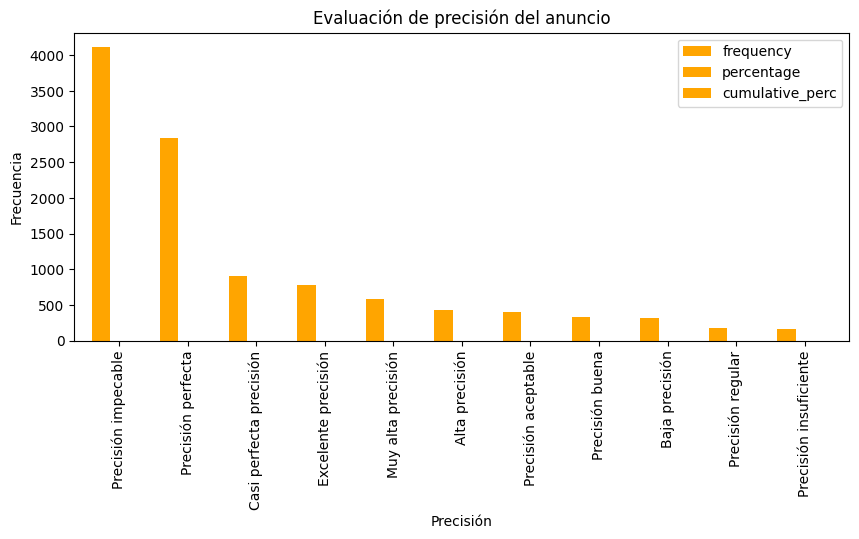

In [220]:
# Realizamos grafico pde barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color="orange")
plt.title('Evaluación de precisión del anuncio')
plt.xlabel('Precisión')
plt.ylabel('Frecuencia')

In [11]:
tabla22=freq_tbl(Naples['host_identity_verified'])
tabla22=tabla22.drop(['percentage','cumulative_perc'], axis=1)
filtro=tabla22[tabla22['frequency']>1]
filtro_index=filtro.set_index('host_identity_verified')
filtro_index

,frequency
host_identity_verified,
t,10218
f,809


<Axes: ylabel='frequency'>

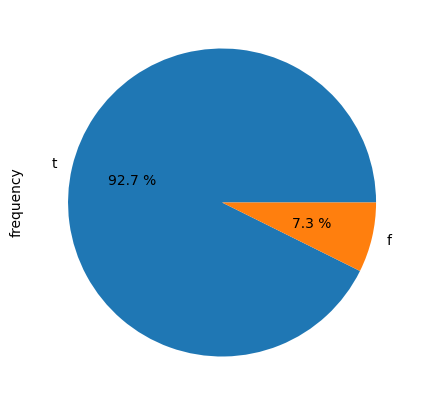

In [12]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

In [221]:
# Naples.to_csv("Naples_Extraccion_Caracteristicas.csv")